<a href="https://colab.research.google.com/github/SalmanArkan/Indonesia-Reksadana/blob/main/Indonesia_Reksadana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE**


## **Business Background**


---



You are a data analyst in an Indonesian investment startup which makes an
application that can buy and sell mutual funds (Indonesian: reksadana). The mutual funds consist of: stocks mutual funds (saham), bond mutual funds (pendapatan tetap),money market mutual funds (pasar uang), and mixed-investment mutual funds (campuran). As the name suggests, the types reflect the underlying investment made by the Fund Manager for the mutual fund.

## **Problem**


---

Mr Djoko as head of data, give you this problem to solve
> "What kinds of thematic campaigns that we can recommend to the marketing team for the next month?"

> In the next month, the marketing team wants to create a thematic campaign
based on user preference. You, as data analyst will be tasked to create a
segmentation for this thematic campaign and give recommendations (as
objective) on the themes on each campaign.

## **Data Description**


---

User Dataset
> Information about registered users in the platform

Daily User Transaction Dataset
> Information on user-level mutual fund balance

# **Import Library and Dataset**

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',99)

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns

# Date time manipulation
from datetime import datetime
from datetime import timedelta

# Sklearn
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

df_Users = pd.read_csv('/content/drive/My Drive/[W6W7W8_JAN23]/Users.csv')
df_Transaction = pd.read_csv('/content/drive/My Drive/[W6W7W8_JAN23]/Daily User Transaction.csv')

Mounted at /content/drive


# **~ MILESTONE 1 ~**

## **Data Cleaning**

### **Users**

---

Column Dictionary:

*  **user_id** =	Client ID on the platform
* **registration_import_datetime** =	Registration time and date at UTC+7 timezone (WIB)
* **user_gender** =	User self-identified gender
* **user_age** = User self-identified age
* **user_occupation**	= User self-identified job
* **user_income_range**	= User self-identified income range
* **referral_code_used** = If user enter referral code during registration, the value is "used referral"; else will be Null valued
* **user_income_source** = User self-declared source of income
* **end_of_month_invested_amount** = End of month total amount of mutual fund that are still invested in the platform
* **total_buy_amount** = Total buying amount of mutual funds
* **total_sell_amount** = Total selling amount of mutual funds

#### Screening Users Dataset


---


In [ ]:
# Display 5 Initial Users Dataset
df_Users.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [ ]:
# Display Users Data Type & Non-null Values
df_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


Insight :
* user_id need to be changed into object
* registration_import_datetime need to be changed into datetime
* There are row null from coloumn referral_code_used

In [ ]:
# Shape Of The Users Dataset
df_Users.shape

(14712, 11)

In [ ]:
# Column View Of The Users Dataset
df_Users.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

#### Copy Users Dataset


---



**Before cleaning the Users dataset, we first need to make a copy of the dataset.**

In [ ]:
# Copy Users Dataset
Users = df_Users.copy()

#### Convet Users Data Types

---



**Convert datatype users ['user_id'] from int64 to object.**

In [ ]:
# Convert Data Type User
Users['user_id'] = Users['user_id'].astype('str')

**Convert datatype users['registration_import_datetime'] from object to DateTime.**

In [ ]:
# Convert Data Type Date Time
Users['registration_import_datetime'] = pd.to_datetime(Users['registration_import_datetime'])

In [ ]:
# Check The Users Data Type From Each Column
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

In [ ]:
# Display 5 Initial Users Dataset
Users.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


#### Check Value & Typo

---

In [ ]:
# Check Value Gender
Users['user_gender'].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

**The results stated that there were 8977 users among men and 5735 among women.**

In [ ]:
# Check Value User
Users['user_age'].value_counts()

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64

**Based on the dataset, it can be said that most users are in the age range of 18-25.**

In [ ]:
# Check Value User Occupation
Users['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

**Most users come from students, with a total of 7887 users.**

In [ ]:
# Check Value User Incomre Range
Users['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

**More users come from having a income of less than 10 million.**

In [ ]:
# Check Value User Incomre Source
Users['user_income_source'].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

**Most users use their salary to do mutual funds.**

#### Handling Missing Values

---



In [ ]:
# Number of Blank Rows
Users.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

**Based on column Users[referral_code_used] there are 9108 missing values.**

In [ ]:
# Check NaN Data
Users[Users['referral_code_used'].isnull()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji,999000,149000,0
...,...,...,...,...,...,...,...,...,...,...,...
14705,4344623,2021-10-17 02:57:06,Female,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,0,0,0
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya,0,0,0
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri,0,0,0


In [ ]:
# Replacing Missing Values In 'referral code' With "not used referral"
Users['referral_code_used'].fillna('not used referral', inplace=True)

In [ ]:
# The Pivot Table For The 'referral code' Column Calculates How Many There Are In Each
Users['referral_code_used'].value_counts()

not used referral    9108
used referral        5604
Name: referral_code_used, dtype: int64

**It can be seen that as many as 5604 users used a referral code, and 9108 did not use a referral code.**

In [ ]:
# Check There Are No NaN Data
Users.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
dtype: int64

#### Removing Duplicates

---



In [ ]:
# Check Duplicate Values
Users_duplicate = Users[Users['user_id'].duplicated()]
Users_duplicate

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount


**There are no duplicates values.**

#### Users Clean Data

---

In [ ]:
# Copy Users Data
Users_Clean = Users.copy()

In [ ]:
# Summary Users Data After Data Cleaning
Users_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

### **Daily User Transaction**

---

Column Dictionary:

* **user_id** = Client ID on the platform
* **date** =	Date of the transaction
* **buy_saham_transaction_amount**= Amount of Saham mutual fund that are bought by user at that date
* **sell_saham_transaction_amount**	= Amount of Saham mutual fund that are sell by user at that date
* **buy_pasar_uang_transaction_amount** = Amount of Pasar Uang mutual fund that are bought by user at that date
* **sell_pasar_uang_transaction_amount** = Amount of Pasar Uang mutual fund that are sell by user at that date
* **buy_pendapatan_tetap_transaction_amount**	= Amount of Pendapatan Tetap mutual fund that are bought by user at that date
* **sell_pendapatan_tetap_transaction_amount** =	Amount of Pendapatan Tetap mutual fund that are sell by user at that date
* **buy_campuran_transaction_amount** = Amount of Campuran mutual fund that are bought by user at that date
* **sell_campuran_transaction_amount** = Amount of Campuran mutual fund that are sell by user at that date
* **total_buy_transaction_amount** = Total mutual fund that are bought by user at that date
* **total_sell_transaction_amount** = Total mutual fund that are sell by user at that date
* **saham_invested_amount**	= Amount of Saham mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **pasar_uang_invested_amount** = Amount of Pasar Uang mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **pendapatan_tetap_invested_amount** = Amount of Pendapatan Tetap mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **campuran_invested_amount** = Amount of Campuran mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **total_invested_amount**	= Total amount of mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)

#### Screening Daily User Transaction Dataset


---


In [ ]:
# Display 5 Initial Daily User Transaction Dataset
df_Transaction.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,0.0,NaN,0.0,NaN,0.0,0.0,Err:511,0,Err:511,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


In [ ]:
# Display Daily User Transaction Data Type & Non-null Values
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1809 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2011 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1582 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          47 non-null      object 
 10  total_buy_transactio

Insight :
* user_id need to be changed into object
* date need to be changed into datetime
* buy_saham_transaction_amount need to be changed into float
* There are row null from coloumn buy_saham_transaction_amount, sell_saham_transaction_amount, buy_pasar_uang_transaction_amount, sell_pasar_uang_transaction_amount, buy_pendapatan_tetap_transaction_amount, sell_pendapatan_tetap_transaction_amount, buy_campuran_transaction_amount, sell_campuran_transaction_amount, total_buy_transaction_amount, total_sell_transaction_amount, saham_invested_amount, pasar_uang_invested_amount, pendapatan_tetap_invested_amount, campuran_invested_amount




In [ ]:
# Shape Of The Daily User Transaction Dataset
df_Transaction.shape

(158811, 17)

In [ ]:
# Column View Of The Daily User Transaction Dataset
df_Transaction.columns

Index(['user_id', 'date', 'buy_saham_transaction_amount',
       'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount',
       'total_buy_transaction_amount', 'total_sell_transaction_amount',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount'],
      dtype='object')

#### Copy Daily User Transaction Dataset


---



**Before cleaning the Daily User Transaction dataset, we first need to make a copy of the dataset.**

In [ ]:
# Copy Daily User Transaction Dataset
Transaction = df_Transaction.copy()

#### Convet Daily User Transaction Data Types

---



**Convert datatype Transaction ['user_id'] from int64 to object.**

In [ ]:
# Convert Data Type User
Transaction['user_id'] = Transaction['user_id'].astype('str')

**Convert datatype Transaction['datetime'] from object to DateTime.**

In [ ]:
# Convert Data Type Date Time
Transaction['date'] = pd.to_datetime(Transaction['date'])

**Convert datatype Transaction['sell_campuran_transaction_amount'] from object to float.**

In [ ]:
# Convert Data Type Sell Campuran Transaction Amount
Transaction['sell_campuran_transaction_amount'] = pd.to_numeric(Transaction['sell_campuran_transaction_amount'], errors='coerce')

**Convert datatype Transaction['total_sell_transaction_amount'] from object to float.**

In [ ]:
# Convert Data Type Total Sell Transaction Amount
Transaction['total_sell_transaction_amount'] = pd.to_numeric(Transaction['total_sell_transaction_amount'], errors='coerce')

**Convert datatype Transaction['total_buy_transaction_amount'] from object to float.**

In [ ]:
# Convert Data Type Total Buy Transaction Amount
Transaction['total_buy_transaction_amount'] = Transaction['total_buy_transaction_amount'].astype('float')

**Convert datatype Transaction['total_invested_amount'] from object to float.**

In [ ]:
# Convert Data Type Total Inverst Amount
Transaction['total_invested_amount'] = Transaction['total_invested_amount'].astype('float')

In [ ]:
# Check The Users Data Type From Each Column
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1809 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2011 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1582 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

In [ ]:
# Display 5 Initial Daily User Transaction Dataset
Transaction.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,10000000.0,10000000.0
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0


#### Handling Missing Values

---



In [ ]:
# Number of Blank Rows
Transaction.isna().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157002
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156800
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157229
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    1
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

**There is a lot of Nan data in the dataset. The data is changed to 0 because the empty data column is numeric data that needs to be changed for analysis purposes.**

In [ ]:
# Replacing Missing Values With 0 
Transaction.fillna(0, inplace=True)
Transaction.isna().sum()

user_id                                     0
date                                        0
buy_saham_transaction_amount                0
sell_saham_transaction_amount               0
buy_pasar_uang_transaction_amount           0
sell_pasar_uang_transaction_amount          0
buy_pendapatan_tetap_transaction_amount     0
sell_pendapatan_tetap_transaction_amount    0
buy_campuran_transaction_amount             0
sell_campuran_transaction_amount            0
total_buy_transaction_amount                0
total_sell_transaction_amount               0
saham_invested_amount                       0
pasar_uang_invested_amount                  0
pendapatan_tetap_invested_amount            0
campuran_invested_amount                    0
total_invested_amount                       0
dtype: int64

#### Check Duplicates

---



In [ ]:
# Check Duplicate Values
Transaction_duplicate = Transaction[Transaction['user_id'].duplicated()]
Transaction_duplicate

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
5,50701,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158732,4157033,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158734,4157054,2021-09-30,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0
158737,4157117,2021-09-30,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0
158739,4157132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0


**From the dataset, it can be seen that there are lots of duplicates in user data. However, this data will not be deleted, assuming that the user makes transactions more than once in using it.**

#### Users Daily User Transaction Data

---

In [ ]:
# Copy Daily User Transaction Data
Transaction_Clean = Transaction.copy()

In [ ]:
# Summary Daily User Transaction Data After Data Cleaning
Transaction_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

### **Merge Data**

---

In [ ]:
# Combine Datasets From Users & Transactions In The 'user_id' Column
Reksa_Dana = Users_Clean.merge(Transaction_Clean,  how = 'left', on='user_id')
Reksa_Dana.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used referral,Gaji,0,0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not used referral,Gaji,0,0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used referral,Gaji,0,0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,2021-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0


In [ ]:
# Drop Coloumn Date
Reksa_Dana = Reksa_Dana.drop(labels='registration_import_datetime', axis=1)
Reksa_Dana = Reksa_Dana.dropna()
Reksa_Dana

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,2021-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
5,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,2021-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
6,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,2021-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
7,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,2021-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165226,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10100000.0,41000000.0,0.0,61100000.0
165227,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10100000.0,41000000.0,0.0,61100000.0
165228,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10100000.0,41000000.0,0.0,61100000.0
165229,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-29,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,0.0,20000000.0,10100000.0,41000000.0,0.0,71100000.0


In [ ]:
# Data Info
Reksa_Dana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 3 to 165230
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   user_gender                               158811 non-null  object        
 2   user_age                                  158811 non-null  int64         
 3   user_occupation                           158811 non-null  object        
 4   user_income_range                         158811 non-null  object        
 5   referral_code_used                        158811 non-null  object        
 6   user_income_source                        158811 non-null  object        
 7   end_of_month_invested_amount              158811 non-null  int64         
 8   total_buy_amount                          158811 non-null  int64         
 9   total_sell_amou

## **Exploratory Data Analysis**

In [ ]:
# Dataset Info
Reksa_Dana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 3 to 165230
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   user_gender                               158811 non-null  object        
 2   user_age                                  158811 non-null  int64         
 3   user_occupation                           158811 non-null  object        
 4   user_income_range                         158811 non-null  object        
 5   referral_code_used                        158811 non-null  object        
 6   user_income_source                        158811 non-null  object        
 7   end_of_month_invested_amount              158811 non-null  int64         
 8   total_buy_amount                          158811 non-null  int64         
 9   total_sell_amou

In [ ]:
# User Value
user = Reksa_Dana['user_id'].count()
print('We have', user, 'users in the data')

We have 158811 users in the data


In [ ]:
# User Data Uniqe
objects = ['user_id', 'user_gender', 'user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source']
Reksa_Dana[objects].describe().transpose()

,count,unique,top,freq
user_id,158811,8277,3740513,42
user_gender,158811,2,Male,97149
user_occupation,158811,9,Pelajar,88865
user_income_range,158811,6,< 10 Juta,68500
referral_code_used,158811,2,not used referral,107440
user_income_source,158811,10,Gaji,99611


Insight:


*   The highest number of users came from user 3740513, with a total of 42
*   The highest number of users came from men, with a total of 97149
*   The highest number of users came from students, with a total of 88865
*   The highest number of users use an income range of less than 10 million, with a total of 68500
*   The largest number of users do not use a referral code, with a total of 107440
*   The highest number of users use their salary to make transactions, with a total of 99611









### Gender


---

In [ ]:
# Value User Gender
Reksa_Dana['user_gender'].value_counts()

Male      97149
Female    61662
Name: user_gender, dtype: int64

In [ ]:
# Make A Copy For Gender Dataset
Gender = Reksa_Dana.copy()

# Show Number Of User Data (Unique) Based On Gender
Gender = Gender.groupby(['user_gender']).nunique()['user_id'].reset_index()

# Make Additional Column (%_user_gender) But Without Can Show The Labeling Via Autopict Plot
Gender['%_User_gender'] = ((Gender['user_id']/(Gender['user_id'].sum()))*100).round(2)

Gender

,user_gender,user_id,%_User_gender
0,Female,3101,37.47
1,Male,5176,62.53


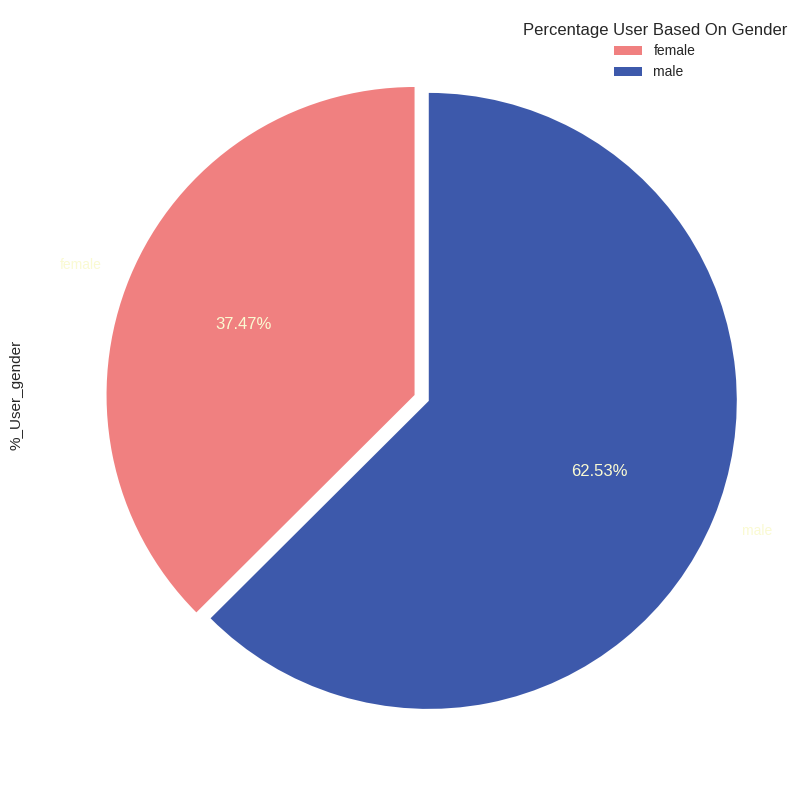

In [ ]:
# Plot Properties
myexplode = [0,0.05]
mycolors = ['#F08080', '#3D59AB']
mylabels = ['female', 'male']

# Show Pie Plot
Gender.plot.pie( y='%_User_gender', autopct='%.2f%%', figsize=(10,10), labels= mylabels, 
                explode = myexplode, colors = mycolors, shadow = False, startangle = 90, textprops = dict(color ="#FAFAD2"), rot=0)

plt.legend(title = 'Percentage User Based On Gender')

**Males dominate users, with 62.53% of users, while females are only 37.47%.**

### Age


---

In [ ]:
# Make User Age Dataset
Age = Reksa_Dana['user_age'].value_counts()

# Show Bar Plot
fig = px.bar(Age, title="Age Of User")
fig.update_layout(xaxis_title = "Age", yaxis_title = "Frequency", title_x = 0.5, 
                  width = 1000, height = 500, bargap = 0.05, showlegend = False)
fig.update_traces(marker_color = '#192D2C')

fig.show()

**Based on the graph, it can be said that most users are in the age range of 18-25.**

### Job


---

In [ ]:
# Check Value Job
Job = Reksa_Dana['user_occupation'].value_counts().rename_axis('occupation').reset_index(name = 'counts')
Job

,occupation,counts
0,Pelajar,88865
1,Swasta,35878
2,Others,15812
3,IRT,8123
4,Pengusaha,5835
5,PNS,2561
6,Guru,1103
7,TNI/Polisi,530
8,Pensiunan,104


**Based on the table, most user is from pelajar.**

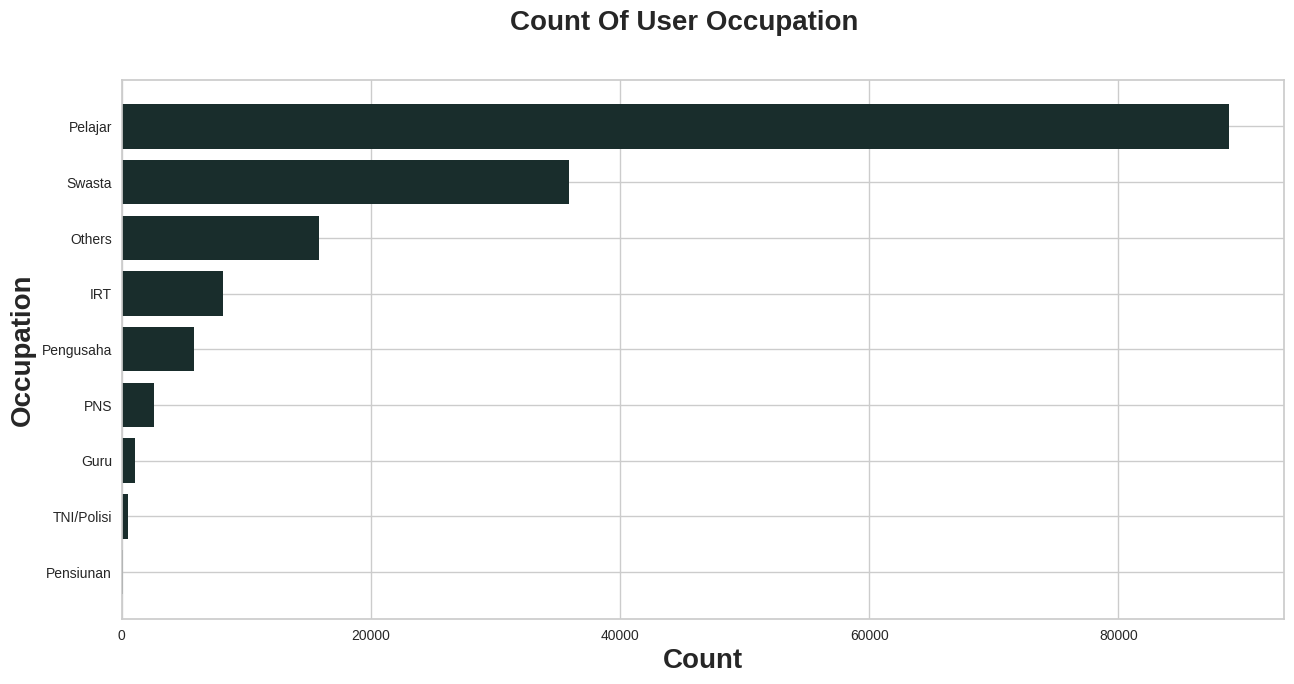

In [ ]:
# Show Horizontal Bar Plot
fig = plt.figure(figsize = (15,7))

fig.suptitle('Count Of User Occupation', weight='bold', fontsize=20)
plt.xlabel('Count', weight='bold', fontsize=20)
plt.ylabel('Occupation', weight='bold', fontsize=20)

Job.sort_values('counts', ascending=True, inplace=True)
x = Job['occupation']
y = Job['counts']

plt.barh(x, y, color=('#192D2C'))
plt.show()

Insight:

Our users are dominated by 
*   Pelajar there are 88865 users
*   Swasta there are 35878 users
*   Others there are 15182 users

### Income


---

In [ ]:
# Check Value Income
Income = Reksa_Dana['user_income_range'].value_counts().rename_axis('income').reset_index(name='counts')
Income

,income,counts
0,< 10 Juta,68500
1,Rp 10 Juta - 50 Juta,49849
2,> Rp 50 Juta - 100 Juta,26489
3,> Rp 100 Juta - 500 Juta,12648
4,> Rp 500 Juta - 1 Miliar,977
5,> Rp 1 Miliar,348


**Based on the table, most user is have a income les then 10 Million.**

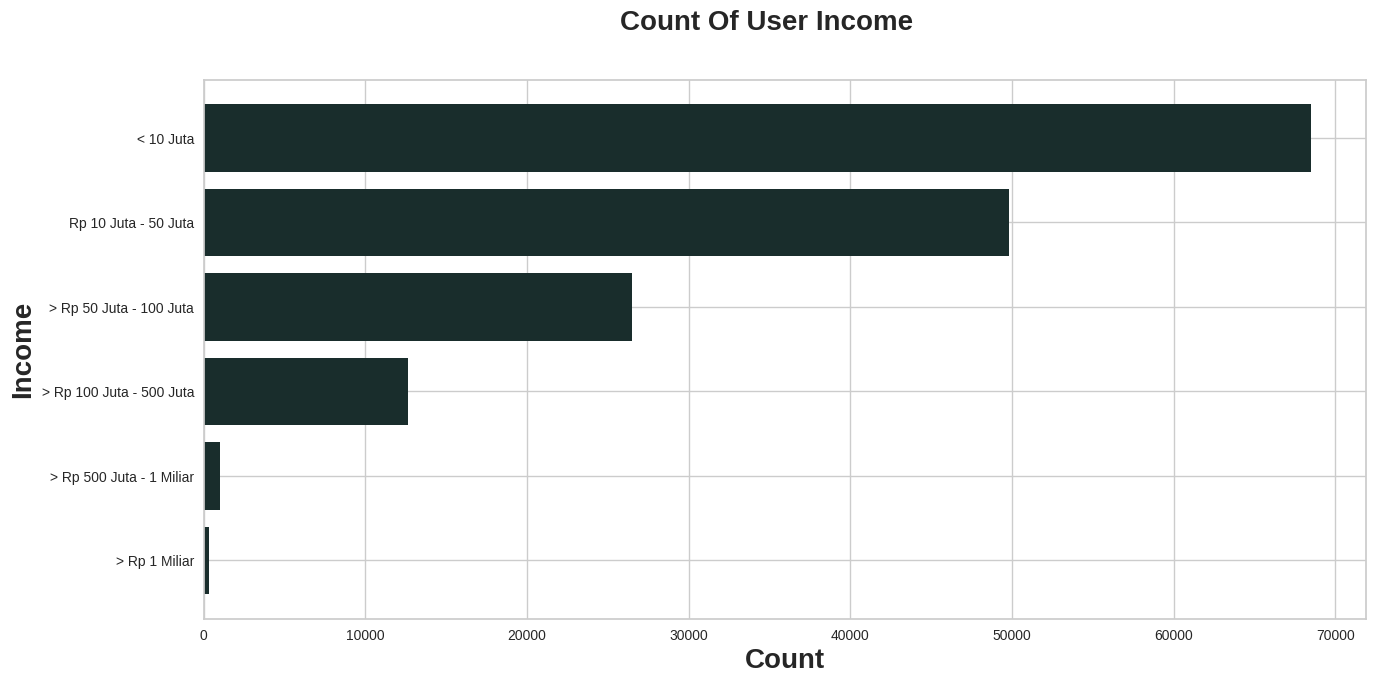

In [ ]:
# Show Horizontal Bar Plot
fig = plt.figure(figsize = (15,7))

fig.suptitle('Count Of User Income', weight='bold', fontsize=20)
plt.xlabel('Count', weight='bold', fontsize=20)
plt.ylabel('Income', weight='bold', fontsize=20)

Income.sort_values('counts', ascending=True, inplace=True)
x = Income['income']
y = Income['counts']

plt.barh(x, y, color=('#192D2C'))
plt.show()

Insight:

Our users are dominated by 
*   <10jt there are 68500 users
*   Rp 10 Juta - 50 Juta there are	49849 users
*   More than Rp 50 Juta - 100 Juta there are 	26489 users

### Referal Code


---

In [ ]:
# Value Referral Code
Reksa_Dana['referral_code_used'].value_counts()

not used referral    107440
used referral         51371
Name: referral_code_used, dtype: int64

In [ ]:
# Make A Copy For Referral Code Dataset
Referral_Code = Reksa_Dana.copy()

# show number of user data (unique) based on gender
Referral_Code = Referral_Code.groupby(['referral_code_used']).nunique()['user_id'].reset_index()
# P_users

# make additional column (%_user_gender) but without can show the labeling via autopict plot
Referral_Code['%_referral_code_used'] = ((Referral_Code['user_id']/(Referral_Code['user_id'].sum()))*100).round(2)
Referral_Code

,referral_code_used,user_id,%_referral_code_used
0,not used referral,5322,64.3
1,used referral,2955,35.7


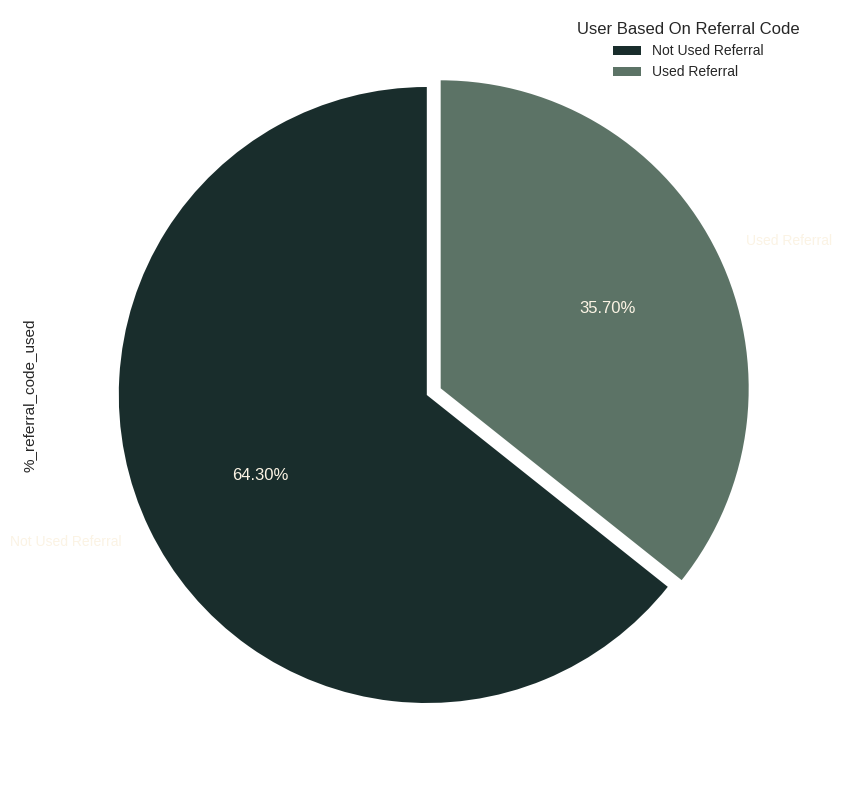

In [ ]:
# Plot Properties
myexplode = [0,0.05]
mycolors = ['#192D2C', '#5C7366']
mylabels = ['Not Used Referral', 'Used Referral']

# Show Pie Plot
Referral_Code.plot.pie( y='%_referral_code_used', autopct='%.2f%%', 
                       figsize=(10,10), labels= mylabels, explode = myexplode, 
                       colors = mycolors, shadow = False, startangle = 90, textprops = dict(color ="#FBF3E4"), rot=0)

plt.legend(title = 'User Based On Referral Code')

**Not used referral codes dominate users, with 64.30% of users, while using referral codes is only 35.70%.**

### Income Source


---

In [ ]:
# Check Value Income Source
Income_Source = Reksa_Dana['user_income_source'].value_counts().rename_axis('source').reset_index(name='counts')
Income_Source

,source,counts
0,Gaji,99611
1,Undian,20558
2,Keuntungan Bisnis,17456
3,Dari Orang Tua / Anak,8800
4,Tabungan,4933
5,Lainnya,4598
6,Hasil Investasi,1238
7,Dari Suami / istri,924
8,Warisan,473
9,Bunga Simpanan,220


**Based on the table, most user is have a income source from wages.**

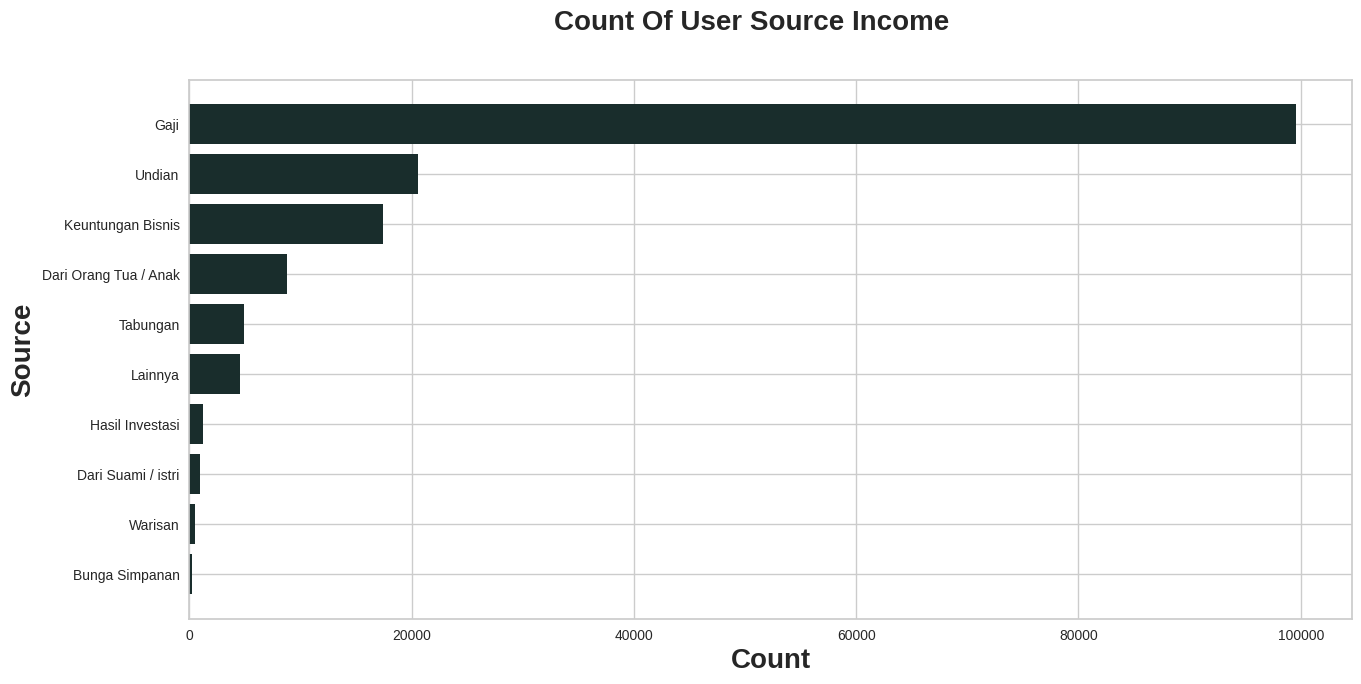

In [ ]:
# Show Horizontal Bar Plot
fig = plt.figure(figsize = (15,7))

fig.suptitle('Count Of User Source Income', weight='bold', fontsize=20)
plt.xlabel('Count', weight='bold', fontsize=20)
plt.ylabel('Source', weight='bold', fontsize=20)

Total_Data = Reksa_Dana['user_id'].count()

Income_Source.sort_values('counts', ascending=True, inplace=True)
x = Income_Source['source']
y = Income_Source['counts']

plt.barh(x, y, color=('#192D2C'))
plt.show()

Insight:

Our users are dominated by 
*   Gaji there are 99611 users
*   Undian there are	20558 users
*   Keuntungan Bisnis there are	17456 users

### **Transaction**

---

#### **Transaction (Days)**

---

In [ ]:
# Chek Date of Dataset
Reksa_Dana['date'] = pd.to_datetime(Reksa_Dana['date'])
Reksa_Dana['date']

3        2021-08-17
4        2021-08-18
5        2021-08-19
6        2021-08-20
7        2021-08-23
            ...    
165226   2021-09-24
165227   2021-09-27
165228   2021-09-28
165229   2021-09-29
165230   2021-09-30
Name: date, Length: 158811, dtype: datetime64[ns]

In [ ]:
# Check Total Buy & Sell Each Type Of Mutual Fund Each Day
Daily_Transaction = Reksa_Dana[['user_id','date','buy_saham_transaction_amount',
                                'sell_saham_transaction_amount','buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount',
                                'buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount',
                                'sell_campuran_transaction_amount']]
                                
Daily_Transaction

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount
3,3816789,2021-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3816789,2021-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3816789,2021-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3816789,2021-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3816789,2021-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
165226,3881981,2021-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165227,3881981,2021-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165228,3881981,2021-09-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165229,3881981,2021-09-29,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Transaction (Weekly)**

---

In [ ]:
# Change Date Time To Weekly Data Set
Reksa_Dana['Weekly'] = Reksa_Dana['date'].dt.strftime('%W')
Reksa_Dana['Weekly']

3         33
4         33
5         33
6         33
7         34
          ..
165226    38
165227    39
165228    39
165229    39
165230    39
Name: Weekly, Length: 158811, dtype: object

In [ ]:
# Check Total Buy & Sell Each Type Of Mutual Fund Weekly
Weekly_Transaction = Reksa_Dana[['user_id','Weekly','buy_saham_transaction_amount',
                                 'sell_saham_transaction_amount','buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount',
                                 'buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount',
                                 'buy_campuran_transaction_amount','sell_campuran_transaction_amount']]
                                 
Weekly_Transaction

,user_id,Weekly,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount
3,3816789,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3816789,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3816789,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3816789,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3816789,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
165226,3881981,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165227,3881981,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165228,3881981,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165229,3881981,39,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Transaction (Monthly)**

---

In [ ]:
# Change Date Time To Mounthly Data Set
Reksa_Dana['Month'] = Reksa_Dana['date'].dt.strftime('%m-%y')
Reksa_Dana['Month']

3         08-21
4         08-21
5         08-21
6         08-21
7         08-21
          ...  
165226    09-21
165227    09-21
165228    09-21
165229    09-21
165230    09-21
Name: Month, Length: 158811, dtype: object

In [ ]:
# Check Total Buy & Sell Each Type Of Mutual Fund Mounthly
Mounthly_Transaction = Reksa_Dana[['user_id','Month','buy_saham_transaction_amount','sell_saham_transaction_amount',
                                   'buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount',
                                   'buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount',
                                   'buy_campuran_transaction_amount','sell_campuran_transaction_amount']]
                                   
Mounthly_Transaction

,user_id,Month,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount
3,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
165226,3881981,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165227,3881981,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165228,3881981,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165229,3881981,09-21,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Average Monthly Buy/Sell**

---

In [ ]:
average_buy_sell = Reksa_Dana[['user_id','Month','buy_saham_transaction_amount','sell_saham_transaction_amount','buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount','sell_campuran_transaction_amount']]

# Transaksi Bersih Saham
average_buy_sell['saham_net_transaction'] = Reksa_Dana['buy_saham_transaction_amount'] + Reksa_Dana['sell_saham_transaction_amount']

# Transaksi Bersih Pasar Uang
average_buy_sell['pasar_uang_net_transaction'] = Reksa_Dana['buy_pasar_uang_transaction_amount'] + Reksa_Dana['sell_pasar_uang_transaction_amount']

# Transaksi Bersih Pendapatan Tetap
average_buy_sell['pendapatan_tetap_net_transaction'] = Reksa_Dana['buy_pendapatan_tetap_transaction_amount'] + Reksa_Dana['sell_pendapatan_tetap_transaction_amount']

# Transaksi Bersih Campuran
average_buy_sell['campuran_net_transaction'] = Reksa_Dana['buy_campuran_transaction_amount'] + Reksa_Dana['sell_campuran_transaction_amount']

# Average Buy/Sell
cols = ['user_id', 'Month', 'buy_saham_transaction_amount', 'sell_saham_transaction_amount', 'saham_net_transaction', 
        'buy_pasar_uang_transaction_amount', 'sell_pasar_uang_transaction_amount', 'pasar_uang_net_transaction', 
        'buy_pendapatan_tetap_transaction_amount', 'sell_pendapatan_tetap_transaction_amount', 'pendapatan_tetap_net_transaction', 
        'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount', 'campuran_net_transaction']
average_buy_sell = average_buy_sell[cols]

average_buy_sell

,user_id,Month,buy_saham_transaction_amount,sell_saham_transaction_amount,saham_net_transaction,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,pasar_uang_net_transaction,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,pendapatan_tetap_net_transaction,buy_campuran_transaction_amount,sell_campuran_transaction_amount,campuran_net_transaction
3,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3816789,08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165226,3881981,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165227,3881981,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165228,3881981,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165229,3881981,09-21,10000000.0,0.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Transpose average_buy_sell Dataset
average_buy_sell = average_buy_sell.groupby(['Month']).agg('mean').T.reset_index()
average_buy_sell = average_buy_sell.rename({'Month': 'index', 'index': 'transaction'}, axis=1)
average_buy_sell

Month,transaction,08-21,09-21
0,buy_saham_transaction_amount,9843.753873,10055.470869
1,sell_saham_transaction_amount,-4227.689998,-2581.855815
2,saham_net_transaction,5616.063875,7473.615054
3,buy_pasar_uang_transaction_amount,31106.507070,21601.500352
4,sell_pasar_uang_transaction_amount,-12351.334579,-4953.844168
5,pasar_uang_net_transaction,18755.172492,16647.656184
6,buy_pendapatan_tetap_transaction_amount,57127.849638,37393.538805
7,sell_pendapatan_tetap_transaction_amount,-3868.203189,-5088.946042
8,pendapatan_tetap_net_transaction,53259.646449,32304.592763
9,buy_campuran_transaction_amount,6079.400870,2682.184634


Text(0, 0.5, 'Mean Transaction')

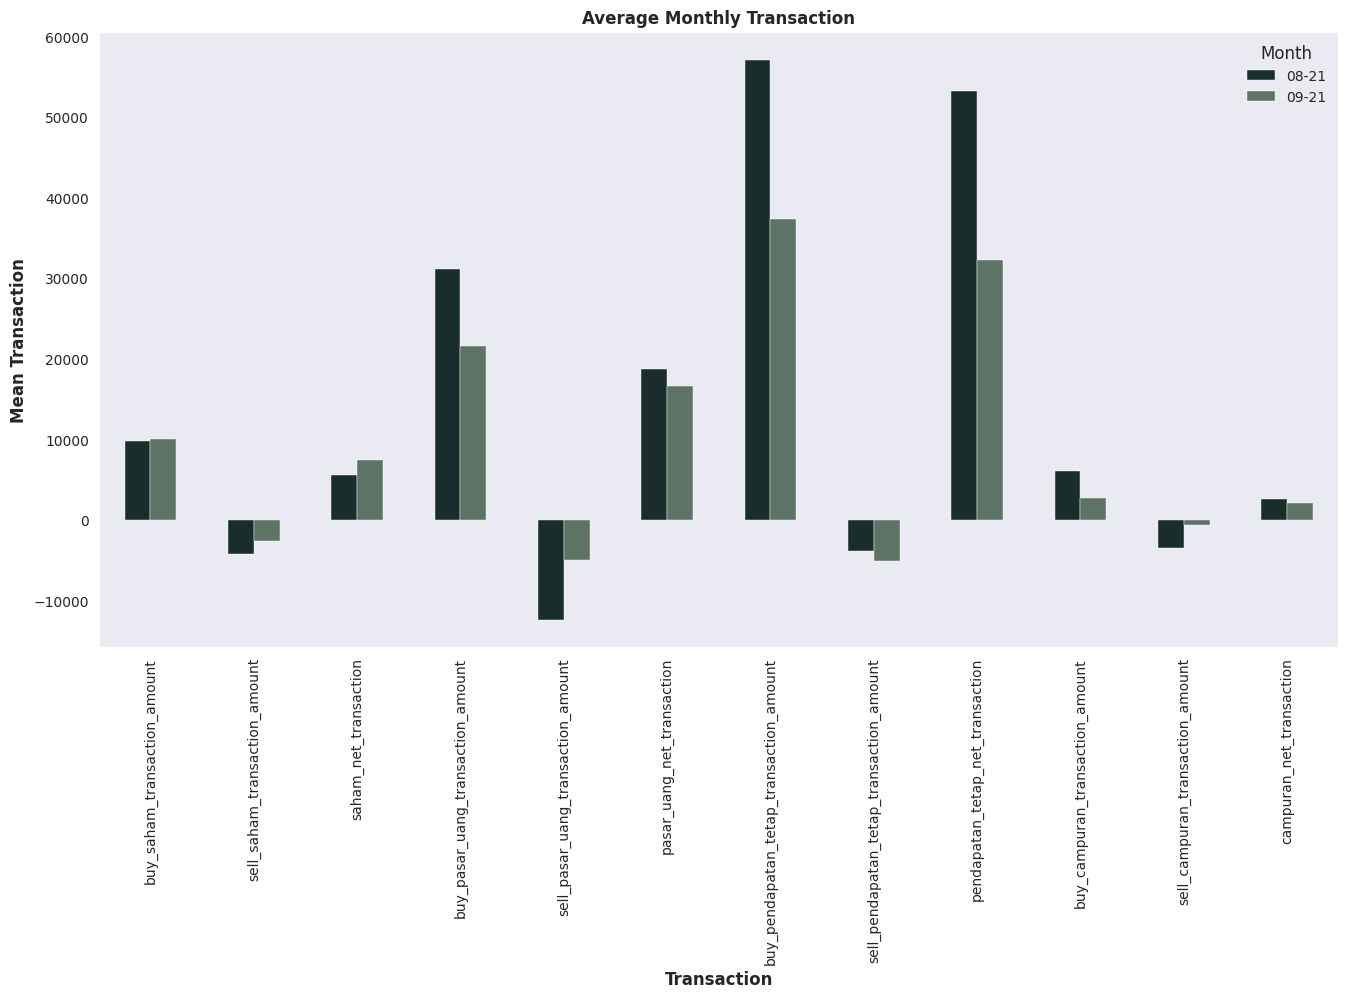

In [ ]:
# Plot average_buy_sell Dataset
sns.set_style("dark")
average_buy_sell.plot(x='transaction', y=['08-21','09-21'], kind="bar", color=['#192D2C', '#5C7366'], figsize=(16,8))
plt.title("Average Monthly Transaction", weight='bold', fontsize=12)
plt.xlabel("Transaction", weight='bold', fontsize=12)
plt.ylabel("Mean Transaction", weight='bold', fontsize=12)

Insight:

*   In average total buying, the mutual fund is the highest average total buying, but mixed investment mutual funds are the lowest average total buying.
*   In average total sell, the market mutual funds are the highest and moderate total sell, but mixed investment mutual funds are the lowest average total sell.
*   In the average total net transaction, the mutual fund is the highest average complete net transaction, but mixed investment mutual funds are the lowest average complete net transaction.

### **Trends**

---


#### **Number Of Buy & Sell Transaction**

---

In [ ]:
# Group Number Transaction By Date
Transaction = Daily_Transaction.replace(0, np.nan).groupby('date').count()
Transaction

,user_id,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount
date,,,,,,,,,
2021-08-04,117,0,0,0,0,0,0,0,0
2021-08-05,204,5,0,6,3,5,0,0,0
2021-08-06,315,9,4,16,2,20,3,1,0
2021-08-09,426,10,17,12,17,18,16,3,0
2021-08-10,577,21,9,24,12,23,9,1,0
2021-08-11,991,26,23,51,13,35,17,2,1
2021-08-12,991,0,18,0,19,0,14,0,0
2021-08-13,1117,23,17,49,12,41,7,2,0
2021-08-16,1350,35,27,65,28,78,24,4,0


In [ ]:
# Group Transaction To Buy & Sell
Transaction['Buy'] = (Transaction[('buy_saham_transaction_amount')] + Transaction[( 'buy_pasar_uang_transaction_amount')] + 
                      Transaction[('buy_pendapatan_tetap_transaction_amount')] +  Transaction[('buy_campuran_transaction_amount')])
Transaction['Sell'] =  (Transaction[('sell_saham_transaction_amount')] + Transaction[( 'sell_pasar_uang_transaction_amount')] + 
                        Transaction[('sell_pendapatan_tetap_transaction_amount')] +  Transaction[('sell_campuran_transaction_amount')])
Transaction = Transaction[['Buy','Sell']].reset_index()
Transaction

,date,Buy,Sell
0,2021-08-04,0,0
1,2021-08-05,16,3
2,2021-08-06,46,9
3,2021-08-09,43,50
4,2021-08-10,69,30
5,2021-08-11,114,54
6,2021-08-12,0,51
7,2021-08-13,115,36
8,2021-08-16,182,79
9,2021-08-17,97,41


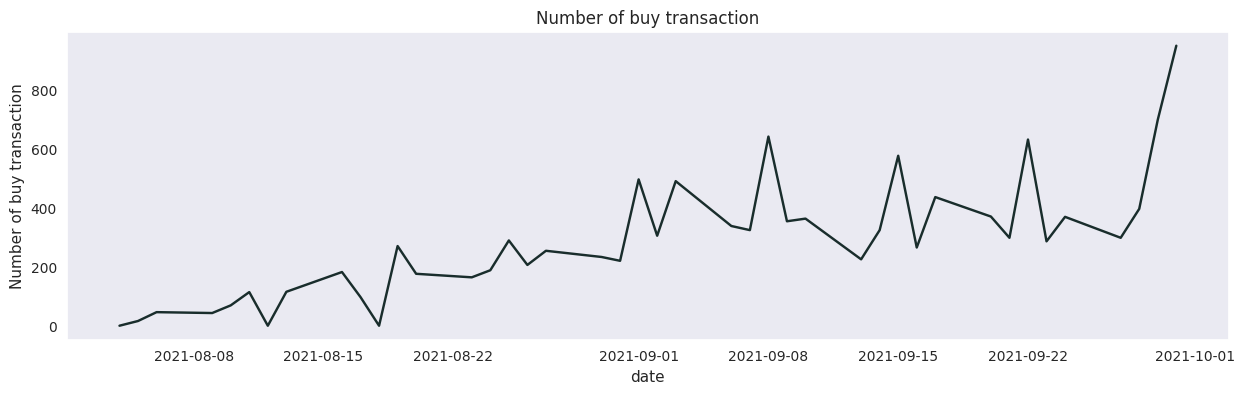

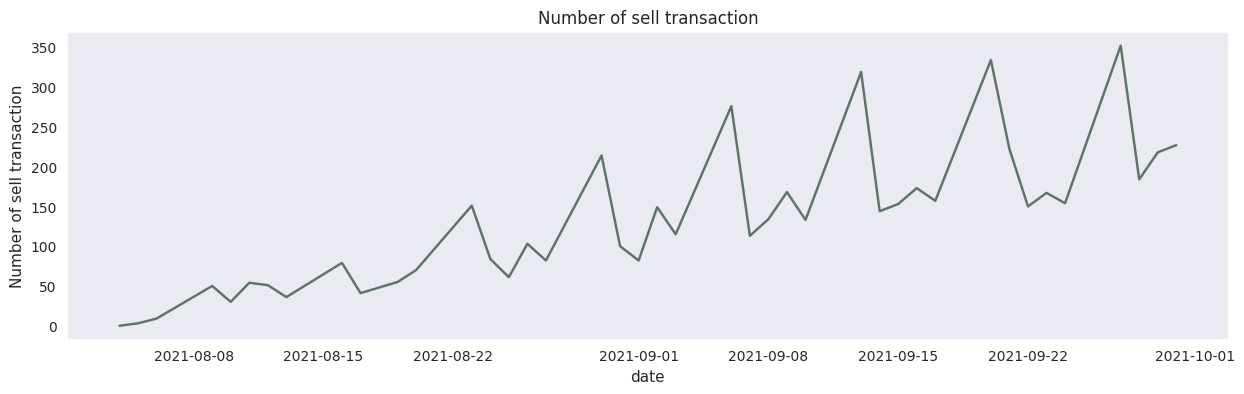

In [ ]:
# Plot Buy Transaction
def plot_trans(trans, x, y, title="", xlabel='date', ylabel='Number of buy transaction', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='#192D2C')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_trans(Transaction, x=Transaction['date'], y=Transaction['Buy'], title='Number of buy transaction')

 
# Plot Sell Transaction
def plot_trans(trans, x, y, title="", xlabel='date', ylabel='Number of sell transaction', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='#5C7366')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_trans(Transaction, x=Transaction['date'], y=Transaction['Sell'], title='Number of sell transaction')

Insight:

We have trends that the number of sell and buy transactions has increased, although it often decreased.

#### **Average Number Of Buy Sell Transaction**

---

In [ ]:
# Make Table Month, Day, Hour, And Day Of Week From Datetime
Transaction['Month'] = Transaction['date'].dt.month_name()
Transaction['Month1'] = Transaction['date'].dt.month
Transaction['Day'] = Transaction['date'].dt.day
Transaction['Day_Of_Week1'] = Transaction['date'].dt.dayofweek
Transaction['Day_Of_Week'] = Transaction['date'].dt.day_name()
Transaction['Weekend'] = Transaction['Day_Of_Week'].apply(lambda x: 1 if (x=='Saturday')|(x=='Sunday') else 0)

##### **Average Number Of Buy & Sell Transaction In Each Month**

---

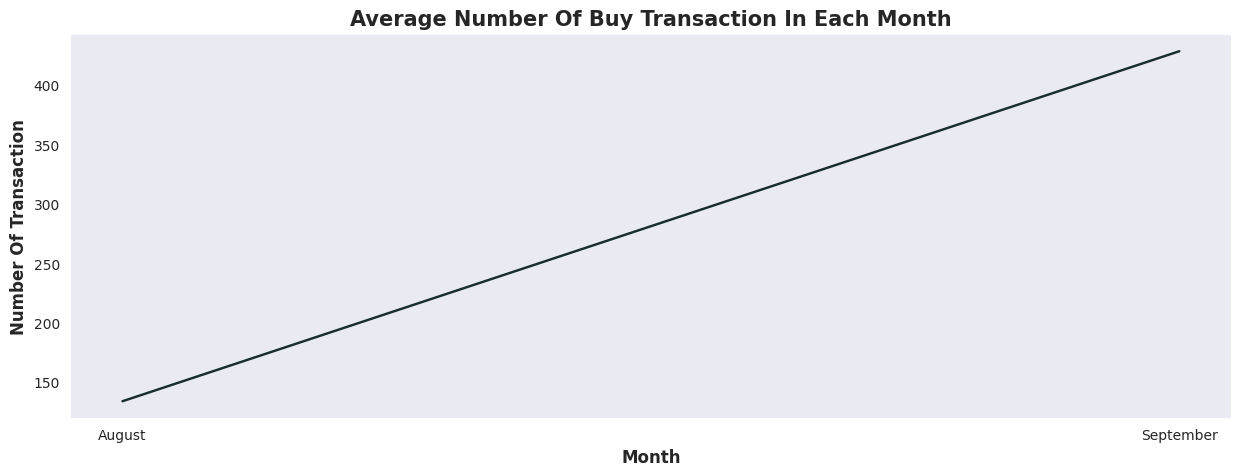

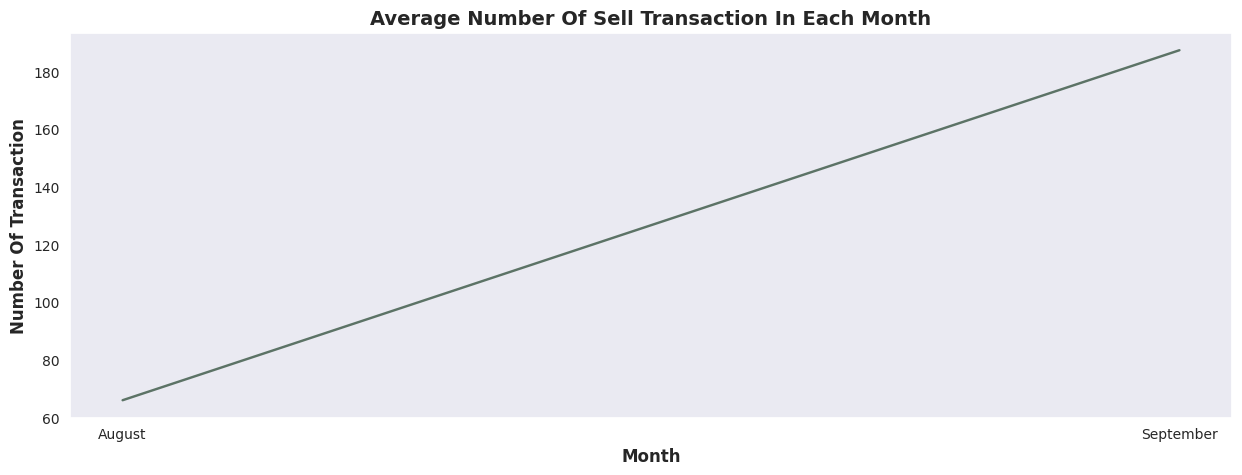

In [ ]:
# Average Number Of Buy Transaction In Each Month
month_index = Transaction.groupby('Month')['Buy'].mean().index
month_value = Transaction.groupby('Month')['Buy'].mean().values

# Plot Average Number Of Buy Transaction In Each Month
plt.figure(figsize=(15,5))
plt.plot(month_index, month_value, color='#192D2C')
plt.ylabel('Number Of Transaction', weight='bold', fontsize=12)
plt.xlabel('Month', weight='bold', fontsize=12)
plt.title('Average Number Of Buy Transaction In Each Month',weight='bold', fontsize=15)
plt.show()

# Average Number Of Sell Transaction In Each Month
month_index = Transaction.groupby('Month')['Sell'].mean().index
month_value = Transaction.groupby('Month')['Sell'].mean().values

# Plot Average Number Of Sell Transaction In Each Month
plt.figure(figsize=(15,5))
plt.plot(month_index, month_value, color='#5C7366')
plt.ylabel('Number Of Transaction', weight='bold', fontsize=12)
plt.xlabel('Month', weight='bold', fontsize=12)
plt.title('Average Number Of Sell Transaction In Each Month',weight='bold', fontsize=14)
plt.show()

Insight:

The average number of buy and sell transactions each month is increasing.

##### **Average Number Of Buy Transaction In Each Day Of Week**

---

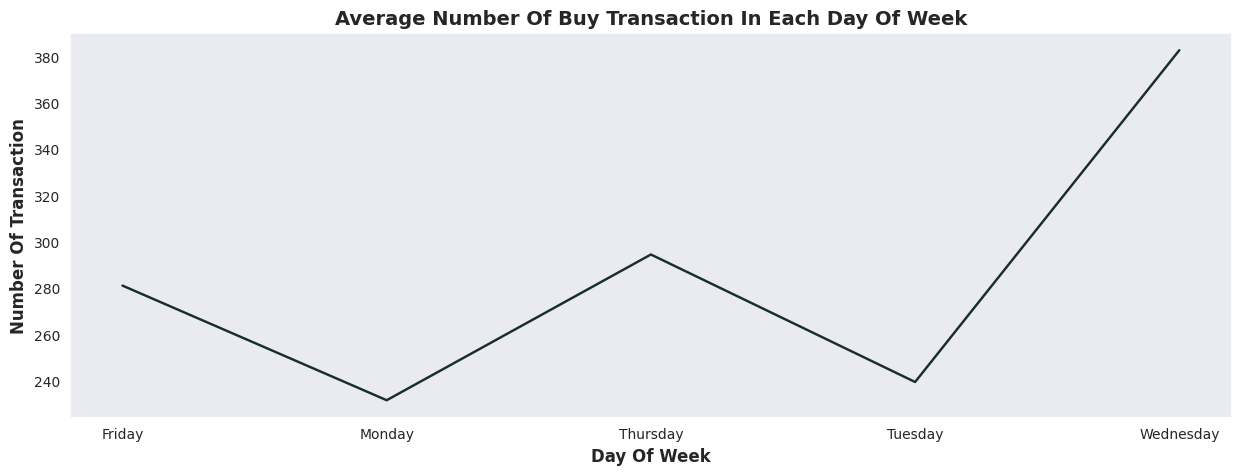

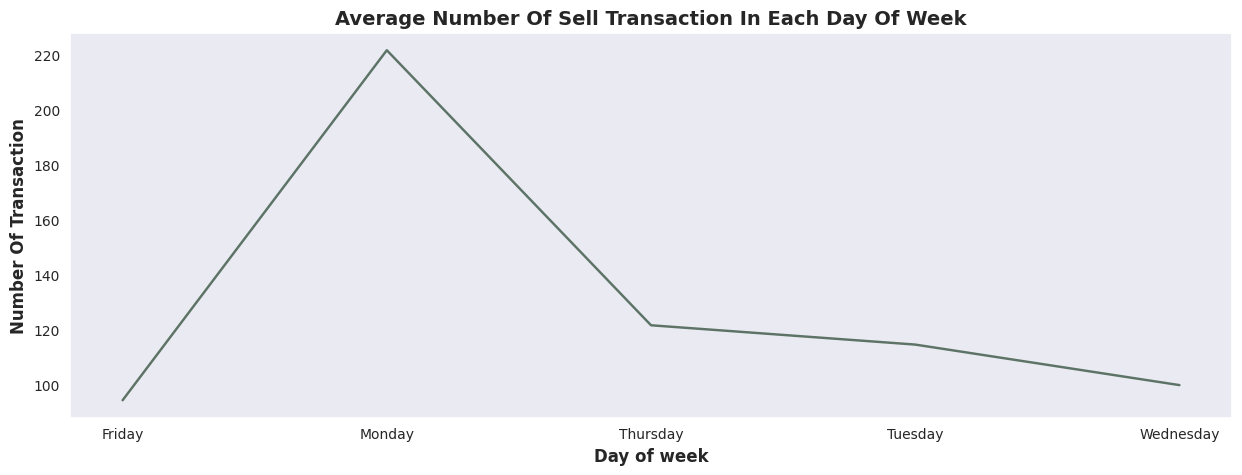

In [ ]:
# Average Number Of Buy Transaction In Each Day Of Week
dow_index = Transaction.groupby('Day_Of_Week')['Buy'].mean().index
dow_value = Transaction.groupby('Day_Of_Week')['Buy'].mean().values
dow_sort = Transaction.sort_values('Day_Of_Week1', ascending=True, inplace=True)

# Plot Average Number Of Buy Transaction In Each Day Of Week
plt.figure(figsize=(15,5))
plt.plot(dow_index, dow_value, color='#192D2C')
plt.ylabel('Number Of Transaction', weight='bold', fontsize=12)
plt.xlabel('Day Of Week', weight='bold', fontsize=12)
plt.title('Average Number Of Buy Transaction In Each Day Of Week', weight='bold', fontsize=14)
plt.show()

# Average Number Of Sell Transaction In Each Day Of Week
dow_index = Transaction.groupby('Day_Of_Week')['Sell'].mean().index
dow_value = Transaction.groupby('Day_Of_Week')['Sell'].mean().values
dow_sort = Transaction.sort_values('Day_Of_Week1', ascending=True, inplace=True)

# Plot Average Number Of Sell Transaction In Each Day Of Week
plt.figure(figsize=(15,5))
plt.plot(dow_index, dow_value, color='#5C7366')
plt.ylabel('Number Of Transaction', weight='bold', fontsize=12)
plt.xlabel('Day of week', weight='bold', fontsize=12)
plt.title('Average Number Of Sell Transaction In Each Day Of Week', weight='bold', fontsize=14)
plt.show()

Insight:


*   In buy transactions, Wednesday is the day with the most average number of buy transactions. While Monday has the least average number of buy transactions.
*    In sell transactions, Monday is the day with the most average number of sell transactions. While Wednesday has the least average number of buy transactions.

##### **Average Number Of Buy & Sell Transaction In Each Month**

---

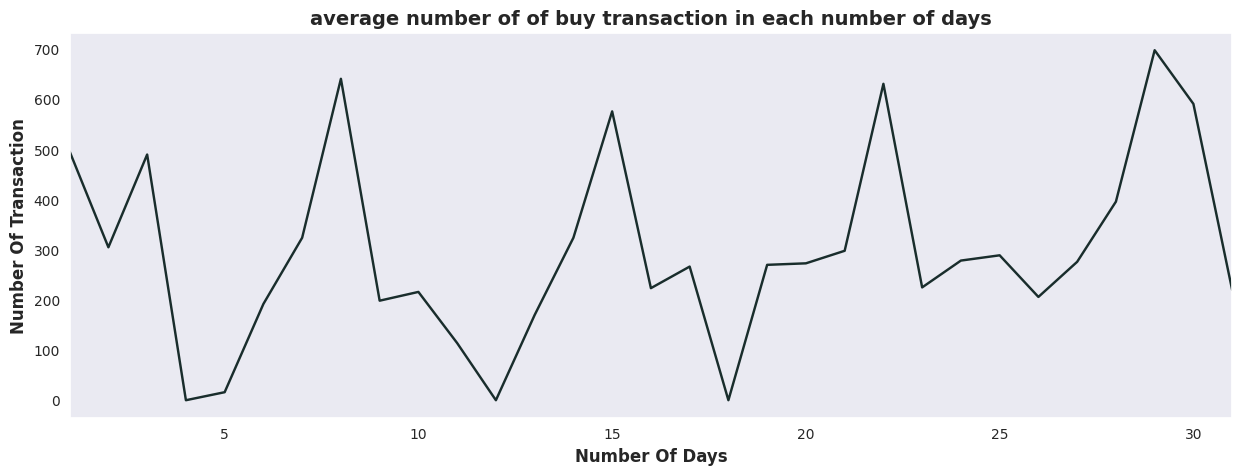

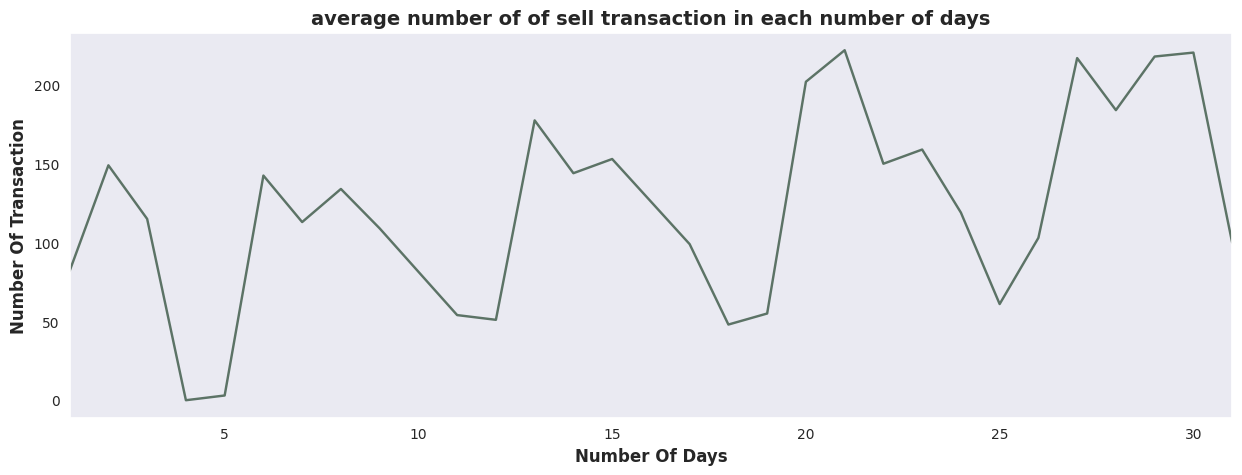

In [ ]:
# Average Number Of Buy Transaction In Each Number Of Days
day_index = Transaction.groupby('Day')['Buy'].mean().index
day_value = Transaction.groupby('Day')['Buy'].mean().values

# Plot Average Number Of Buy Transaction In Each Number Of Days
plt.figure(figsize=(15,5))
plt.plot(day_index, day_value, color='#192D2C')
plt.ylabel('Number Of Transaction', weight='bold', fontsize=12)
plt.xlabel('Number Of Days', weight='bold', fontsize=12)
plt.xlim(1,31)
plt.title('average number of of buy transaction in each number of days', weight='bold', fontsize=14)
plt.show()

# Average Number Of Sell Transaction In Each Number Of Days
day_index = Transaction.groupby('Day')['Sell'].mean().index
day_value = Transaction.groupby('Day')['Sell'].mean().values

# Plot Average Number Of Sell Transaction In Each Number Of Days
plt.figure(figsize=(15,5))
plt.plot(day_index, day_value, color='#5C7366')
plt.ylabel('Number Of Transaction', weight='bold', fontsize=12)
plt.xlabel('Number Of Days', weight='bold', fontsize=12)
plt.xlim(1,31)
plt.title('average number of of sell transaction in each number of days', weight='bold', fontsize=14)
plt.show()

Insight:


*   Around the 20th - 30th (end of the month) is the date with the most purchase transactions.
*  The 1st-5th (beginning of the month) is the date with the most sales transactions.

# **~ MILESTONE 2 ~**

## **User Active Transaction**

### **Users Number Of Total Transaction**

---

In [ ]:
# Dataset Number Of Total Transaction
Number_Of_Total_Transaction = Transaction_Clean.copy()
Number_Of_Total_Transaction = Number_Of_Total_Transaction.replace(0, np.nan).groupby('user_id').count().reset_index()
Number_Of_Total_Transaction

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,1004326,31,0,0,0,0,0,0,0,0,0,0,31,31,31,0,31
1,1005053,2,0,0,0,0,0,0,0,0,0,0,2,2,2,0,2
2,1005165,21,0,0,0,0,0,0,0,0,0,0,21,21,21,0,21
3,1018814,23,0,0,0,1,0,0,0,0,0,1,0,19,0,0,19
4,1023627,34,0,0,0,0,0,0,0,0,0,0,34,0,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,988940,12,0,0,0,0,0,0,0,0,0,0,12,12,12,0,12
8273,989618,30,1,0,1,0,2,0,0,0,2,0,30,30,30,0,30
8274,990466,24,2,0,2,0,2,0,0,0,3,0,24,24,24,0,24
8275,99245,11,0,0,0,0,0,0,0,0,0,0,0,11,11,0,11


In [ ]:
# Number Of Total Transaction Based On Users
Number_Of_Total_Transaction['Total_Spending_Transaction'] = (Number_Of_Total_Transaction[('buy_saham_transaction_amount')] + 
                                                             Number_Of_Total_Transaction[( 'buy_pasar_uang_transaction_amount')] + 
                                                             Number_Of_Total_Transaction[('buy_pendapatan_tetap_transaction_amount')] + 
                                                             Number_Of_Total_Transaction[('buy_campuran_transaction_amount')] + 
                                                             Number_Of_Total_Transaction[('sell_saham_transaction_amount')] + 
                                                             Number_Of_Total_Transaction[( 'sell_pasar_uang_transaction_amount')] + 
                                                             Number_Of_Total_Transaction[('sell_pendapatan_tetap_transaction_amount')] + 
                                                             Number_Of_Total_Transaction[('sell_campuran_transaction_amount')])
Number_Of_Total_Transaction.drop(columns=[('date'), ('buy_saham_transaction_amount'), ( 'buy_pasar_uang_transaction_amount'), 
                                          ('buy_pendapatan_tetap_transaction_amount'), ('buy_campuran_transaction_amount'), 
                                          ('sell_saham_transaction_amount'), ( 'sell_pasar_uang_transaction_amount'), 
                                          ('sell_pendapatan_tetap_transaction_amount'), ('sell_campuran_transaction_amount'), 
                                          ('total_buy_transaction_amount'), ('total_sell_transaction_amount'), ('saham_invested_amount'), 
                                          ('pasar_uang_invested_amount'), ('pendapatan_tetap_invested_amount'), ('campuran_invested_amount'), 
                                          ('total_invested_amount')],inplace=True)

Number_Of_Total_Transaction

,user_id,Total_Spending_Transaction
0,1004326,0
1,1005053,0
2,1005165,0
3,1018814,1
4,1023627,0
...,...,...
8272,988940,0
8273,989618,4
8274,990466,6
8275,99245,0


### **Users Total Spending Transaction**

---

In [ ]:
# Dataset Total Spending Transaction
Total_Spending_Transaction = Transaction_Clean.copy()
Total_Spending_Transaction = Total_Spending_Transaction.replace(0, np.nan).groupby('user_id').sum().reset_index()
Total_Spending_Transaction

,user_id,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,1004326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2790000.0,620000.0,2790000.0,0.0,6200000.0
1,1005053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,20000.0,80000.0,0.0,400000.0
2,1005165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0,420000.0,1470000.0,0.0,2100000.0
3,1018814,0.0,0.0,0.0,-1300000.0,0.0,0.0,0.0,0.0,0.0,-1300000.0,0.0,24700000.0,0.0,0.0,24700000.0
4,1023627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3400000.0,0.0,0.0,0.0,3400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,988940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600000.0,3480000.0,1920000.0,0.0,6000000.0
8273,989618,480000.0,0.0,100000.0,0.0,1420000.0,0.0,0.0,0.0,2000000.0,0.0,24180000.0,5100000.0,28720000.0,0.0,58000000.0
8274,990466,770000.0,0.0,150000.0,0.0,580000.0,0.0,0.0,0.0,1500000.0,0.0,9320000.0,2400000.0,12520000.0,0.0,24240000.0
8275,99245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5500000.0,5500000.0,0.0,11000000.0


In [ ]:
# Total Spending Transaction Based On Users
Total_Spending_Transaction['Total_Spending_Transaction'] = Total_Spending_Transaction[('buy_saham_transaction_amount')] + Total_Spending_Transaction[( 'buy_pasar_uang_transaction_amount')] + Total_Spending_Transaction[('buy_pendapatan_tetap_transaction_amount')] + Total_Spending_Transaction[('buy_campuran_transaction_amount')] + Total_Spending_Transaction[('sell_saham_transaction_amount')] + Total_Spending_Transaction[( 'sell_pasar_uang_transaction_amount')] + Total_Spending_Transaction[('sell_pendapatan_tetap_transaction_amount')] + Total_Spending_Transaction[('sell_campuran_transaction_amount')]
Total_Spending_Transaction.drop(columns=[('buy_saham_transaction_amount'), ( 'buy_pasar_uang_transaction_amount'), ('buy_pendapatan_tetap_transaction_amount'), ('buy_campuran_transaction_amount'), ('sell_saham_transaction_amount'), ( 'sell_pasar_uang_transaction_amount'), ('sell_pendapatan_tetap_transaction_amount'), ('sell_campuran_transaction_amount'), ('total_buy_transaction_amount'), ('total_sell_transaction_amount'), ('saham_invested_amount'), ('pasar_uang_invested_amount'), ('pendapatan_tetap_invested_amount'), ('campuran_invested_amount'), ('total_invested_amount')],inplace=True)

Total_Spending_Transaction

,user_id,Total_Spending_Transaction
0,1004326,0.0
1,1005053,0.0
2,1005165,0.0
3,1018814,-1300000.0
4,1023627,0.0
...,...,...
8272,988940,0.0
8273,989618,2000000.0
8274,990466,1500000.0
8275,99245,0.0


### **User Active Based In August**

---

In [ ]:
# User Active Based In August
User_August = Reksa_Dana.copy()
User_August.drop(columns=[('date'), ('Weekly'), ('buy_saham_transaction_amount'), ( 'buy_pasar_uang_transaction_amount'), 
                          ('buy_pendapatan_tetap_transaction_amount'), ('buy_campuran_transaction_amount'), ('sell_saham_transaction_amount'), 
                          ( 'sell_pasar_uang_transaction_amount'), ('sell_pendapatan_tetap_transaction_amount'), ('sell_campuran_transaction_amount'), 
                          ('total_buy_transaction_amount'), ('total_sell_transaction_amount'), ('saham_invested_amount'), ('pasar_uang_invested_amount'), 
                          ('pendapatan_tetap_invested_amount'), ('campuran_invested_amount'), ('total_invested_amount')],inplace=True)
August = User_August['Month'] == '08-21'
User_August =  User_August.loc[August]

User_August

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21
5,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21
6,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21
7,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21
...,...,...,...,...,...,...,...,...,...,...,...
165188,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21
165189,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21
165190,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21
165191,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21


In [ ]:
# Convert Datatype 
User_August['user_id']=User_August['user_id'].astype(str)
Number_Of_Total_Transaction['user_id']=Number_Of_Total_Transaction['user_id'].astype(str)
Total_Spending_Transaction['user_id']=Total_Spending_Transaction['user_id'].astype(str)

# Merge DataFrame
User_August =  (User_August.merge(Number_Of_Total_Transaction,  how = 'left', on='user_id').
                merge(Total_Spending_Transaction,  how = 'left', on='user_id'))

# Rename Column
User_August.rename(columns={'Total_Spending_Transaction_x':'Number_Of_Total_Transaction', 
                            'Total_Spending_Transaction_y':'Total_Spending_Transaction'},inplace=True)

User_August

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31040,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31041,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31042,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31043,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0


In [ ]:
# Users Make Transaction
any_total_transaction = User_August['Number_Of_Total_Transaction'] > 0
User_August = User_August.loc[any_total_transaction]

User_August

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31040,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31041,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31042,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31043,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0


### **User Active Based In September**

---

In [ ]:
# User Active Based In September
User_September = Reksa_Dana.copy()
User_September.drop(columns=[('date'), ('Weekly'), ('buy_saham_transaction_amount'), ( 'buy_pasar_uang_transaction_amount'), 
                             ('buy_pendapatan_tetap_transaction_amount'), ('buy_campuran_transaction_amount'), ('sell_saham_transaction_amount'), 
                             ( 'sell_pasar_uang_transaction_amount'), ('sell_pendapatan_tetap_transaction_amount'), ('sell_campuran_transaction_amount'), 
                             ('total_buy_transaction_amount'), ('total_sell_transaction_amount'), ('saham_invested_amount'), ('pasar_uang_invested_amount'), 
                             ('pendapatan_tetap_invested_amount'), ('campuran_invested_amount'), ('total_invested_amount')],inplace=True)
September = User_September['Month'] == '09-21'
User_September =  User_September.loc[September]

User_September

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month
14,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21
15,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21
16,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21
17,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21
18,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21
...,...,...,...,...,...,...,...,...,...,...,...
165226,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21
165227,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21
165228,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21
165229,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21


In [ ]:
# Convert Datatype 
User_September['user_id']=User_September['user_id'].astype(str)
Number_Of_Total_Transaction['user_id']=Number_Of_Total_Transaction['user_id'].astype(str)
Total_Spending_Transaction['user_id']=Total_Spending_Transaction['user_id'].astype(str)

# Merge DataFrame
User_September =  (User_September.merge(Number_Of_Total_Transaction,  how = 'left', on='user_id').
                   merge(Total_Spending_Transaction,  how = 'left', on='user_id'))

# Rename Column
User_September.rename(columns={'Total_Spending_Transaction_x':'Number_Of_Total_Transaction', 
                               'Total_Spending_Transaction_y':'Total_Spending_Transaction'},inplace=True)

User_September

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127761,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127762,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127763,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127764,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0


In [ ]:
# Users Make Transaction
any_total_transaction = User_September['Number_Of_Total_Transaction'] > 0
User_September = User_September.loc[any_total_transaction]

User_September

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127761,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127762,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127763,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127764,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0


## **Clustering**

### **Based In August**

---

In [ ]:
# Dataset User In August
User_August

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,08-21,1,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31040,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31041,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31042,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0
31043,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,not used referral,Gaji,0,150000,-250000,08-21,6,-100000.0


In [ ]:
# Columns User In August
User_August.columns

Index(['user_id', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'referral_code_used', 'user_income_source',
       'end_of_month_invested_amount', 'total_buy_amount', 'total_sell_amount',
       'Month', 'Number_Of_Total_Transaction', 'Total_Spending_Transaction'],
      dtype='object')

In [ ]:
# Dataset Cluster In August
Cluster_August = User_August[['user_id', 'user_age', 'user_income_range', 'Number_Of_Total_Transaction', 'Total_Spending_Transaction']]
Cluster_August

,user_id,user_age,user_income_range,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
1,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
2,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
3,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
4,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
...,...,...,...,...,...
31040,3812221,49,> Rp 100 Juta - 500 Juta,6,-100000.0
31041,3812221,49,> Rp 100 Juta - 500 Juta,6,-100000.0
31042,3812221,49,> Rp 100 Juta - 500 Juta,6,-100000.0
31043,3812221,49,> Rp 100 Juta - 500 Juta,6,-100000.0


In [ ]:
# Make Category For Users Income Range
Cluster_August['user_income_range'] = Cluster_August['user_income_range'].astype('category')
Cluster_August['user_income_range'] = Cluster_August['user_income_range'].cat.set_categories(['< 10 Juta','Rp 10 Juta - 50 Juta',
                                                                                                    '> Rp 50 Juta - 100 Juta','> Rp 100 Juta - 500 Juta',
                                                                                                    '> Rp 500 Juta - 1 Miliar','> Rp 1 Miliar'])
Cluster_August['user_income_range'].cat.codes
Cluster_August['user_income_category'] = Cluster_August['user_income_range'].cat.codes

# Drop Coloumn User Income Range
Cluster_August.drop(columns=['user_income_range'],inplace=True)

# Dataset Cluster In September
Cluster_August = Cluster_August[['user_id', 'user_age', 'user_income_category', 'Number_Of_Total_Transaction', 'Total_Spending_Transaction']]

Cluster_August

,user_id,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,53,2,1,100000.0
1,3816789,53,2,1,100000.0
2,3816789,53,2,1,100000.0
3,3816789,53,2,1,100000.0
4,3816789,53,2,1,100000.0
...,...,...,...,...,...
31040,3812221,49,3,6,-100000.0
31041,3812221,49,3,6,-100000.0
31042,3812221,49,3,6,-100000.0
31043,3812221,49,3,6,-100000.0


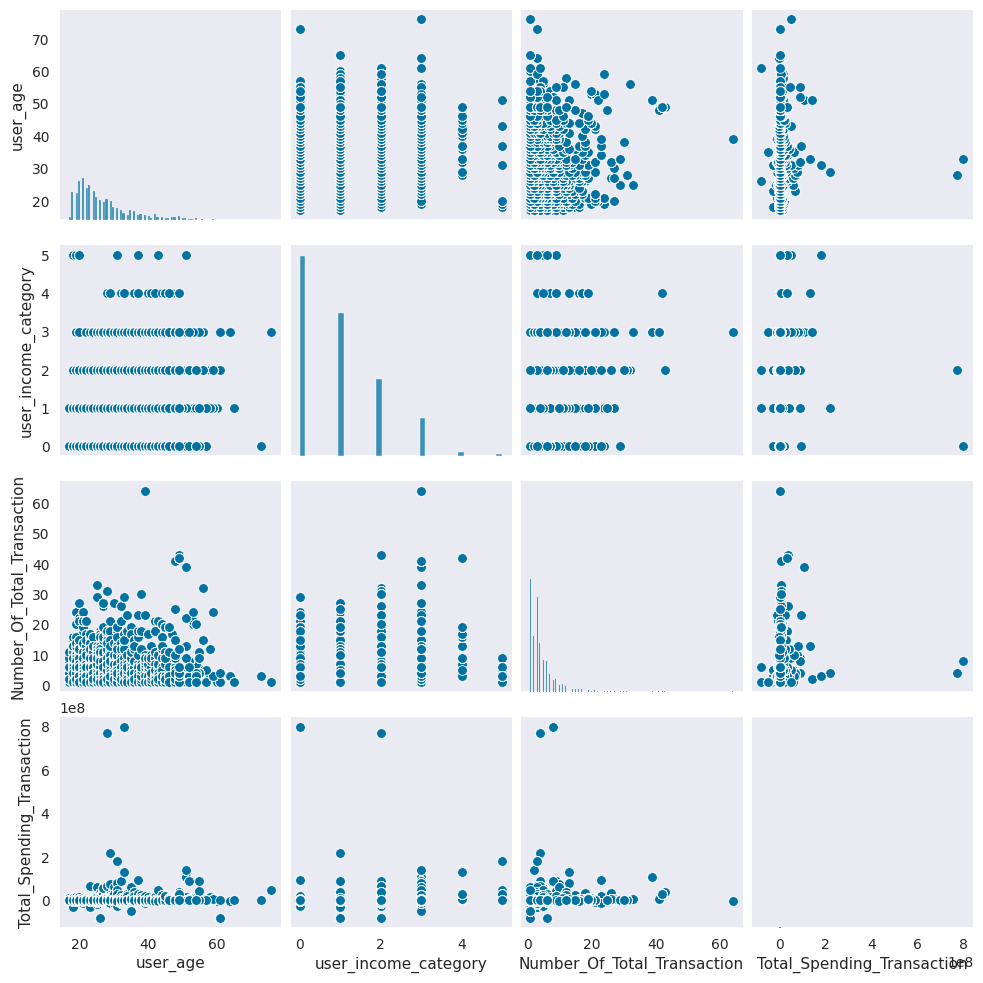

In [ ]:
# Plot Scatter Cluster In August
sns.pairplot(data = Cluster_August)

In [ ]:
# Users Transaction More Than 15 Times
Cluster_August_15 = Cluster_August['Number_Of_Total_Transaction'] > 15.0
Cluster_August = Cluster_August.loc[Cluster_August_15]

# Make user_id As Index
Cluster_August.set_index(['user_id'], inplace=True)
Cluster_August

Cluster_August 

,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction
user_id,,,,
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
...,...,...,...,...
3765807,49,4,42,29790000.0
3765807,49,4,42,29790000.0
3765807,49,4,42,29790000.0


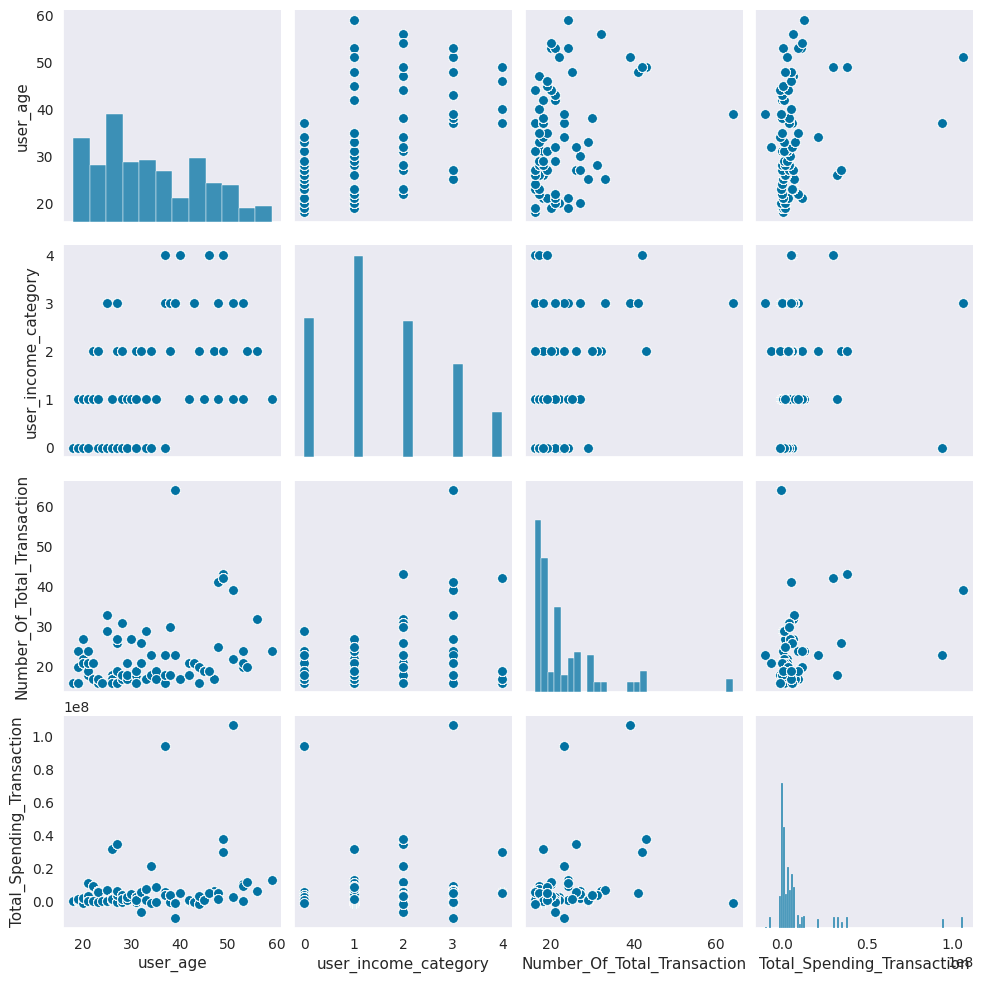

In [ ]:
# Plot Scatter Cluster In September When Transaction More Than 15 Times
sns.pairplot(data = Cluster_August)

#### **K-Means**

---

In [ ]:
Cluster_Model_August = KMeans(n_clusters = 2, random_state = 42)
Cluster_Model_August

KMeans(n_clusters=2, random_state=42)

In [ ]:
Cluster_Model_August.fit(Cluster_August)

KMeans(n_clusters=2, random_state=42)

In [ ]:
Cluster_Model_August.labels_
Cluster_Model_August.cluster_centers_

array([[3.32928490e+01, 1.51305335e+00, 2.26299659e+01, 4.79380858e+06],
       [4.47777778e+01, 1.66666667e+00, 3.18888889e+01, 1.00916667e+08]])

In [ ]:
# Check Cluster Label
Cluster_Model_August.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
Cluster_August['Cluster'] = Cluster_Model_August.labels_
Cluster_August

,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction,Cluster
user_id,,,,,
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
...,...,...,...,...,...
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0


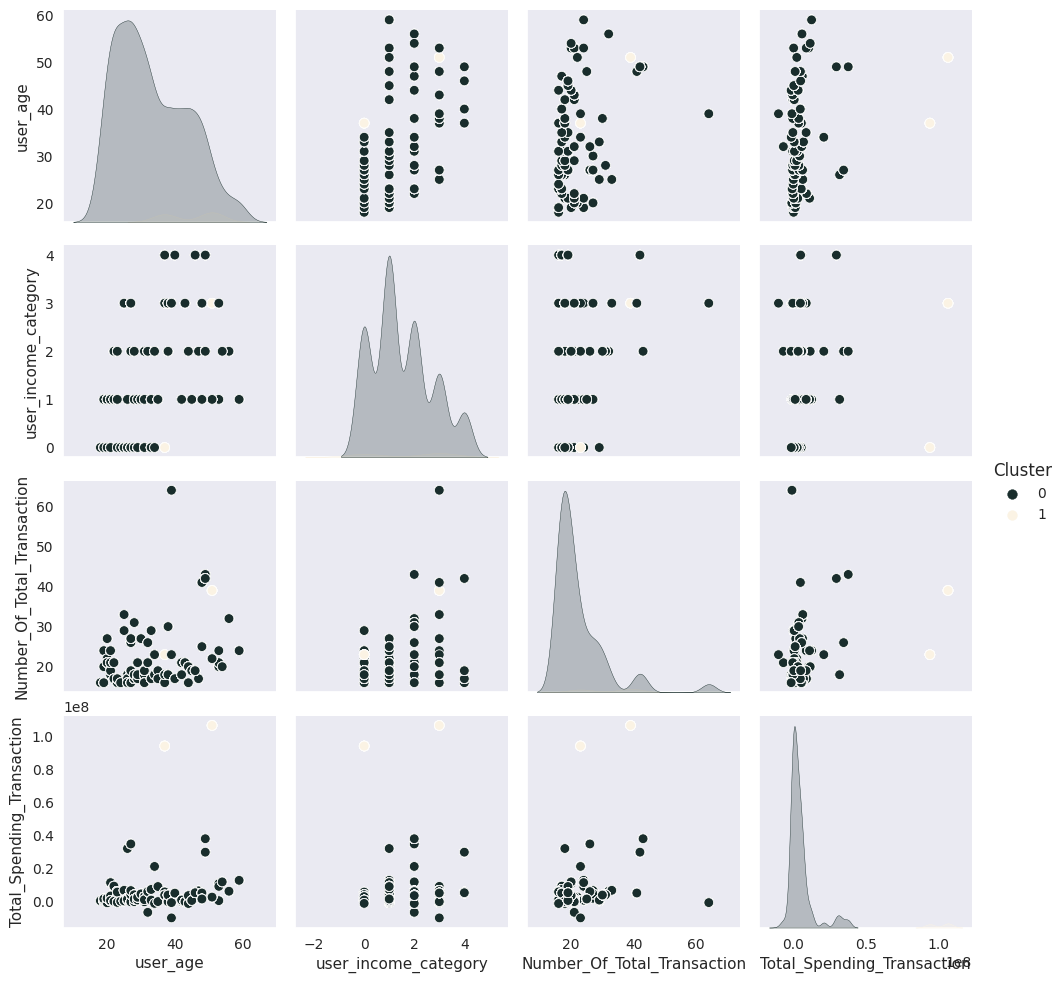

In [ ]:
# Plot Pairplot
sns.pairplot(data = Cluster_August, hue = 'Cluster', palette  = {0:'#192D2C',1:'#FBF3E4'})

Insight:

*  There are 2 cluster.

#### **Elbow**

---

In [ ]:
# Calculate The Distortion Value
distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel_August = KMeans(n_clusters, random_state = 8)
  kmeanModel_August.fit(Cluster_August)
  distortions.append(kmeanModel_August.inertia_)

print(distortions)

[3.049569614810044e+17, 6.290579771169656e+16, 1.3268972855187264e+16, 6452318888636878.0, 4331376033286142.0, 3375959368975666.0, 2341722557755581.5, 1521543359658570.2, 1052624459903062.2, 604508474715240.8]


In [ ]:
# Drop Columns Cluster
Cluster_August.drop(columns=['Cluster'], inplace = True)

1 3.049569614810044e+17
2 6.290579771169656e+16
3 1.3268972855187264e+16
4 6452318888636878.0
5 4331376033286142.0
6 3375959368975666.0
7 2341722557755581.5
8 1521543359658570.2
9 1052624459903062.2
10 604508474715240.8


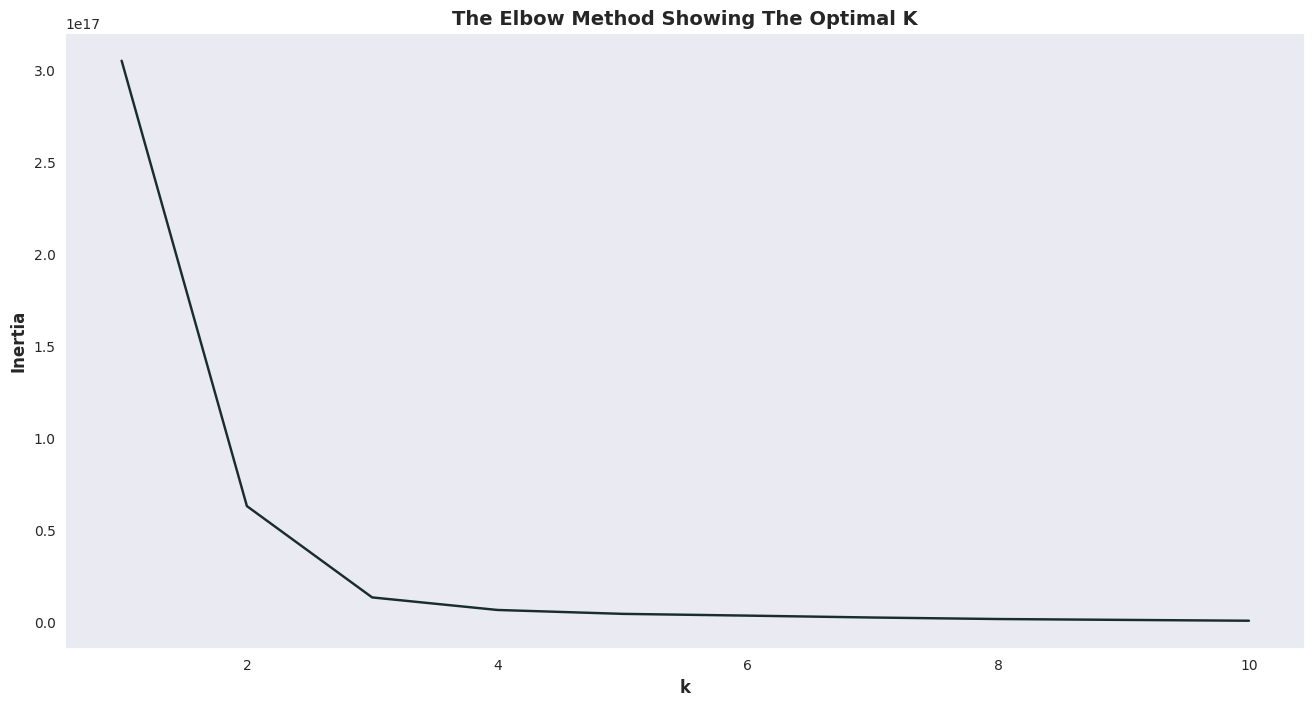

In [ ]:
# Plot Elbow Score
distortions = []
K = range(1,11)
for k in K:
    kmeanModel_August = cluster.KMeans(n_clusters=k, random_state = 8)
    kmeanModel_August.fit(Cluster_August)
    distortions.append(kmeanModel_August.inertia_)
    print(k, kmeanModel_August.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', color='#192D2C')
plt.xlabel('k', weight='bold', fontsize=12)
plt.ylabel('Inertia', weight='bold', fontsize=12)
plt.title('The Elbow Method Showing The Optimal K', weight='bold', fontsize=14)
plt.show()

Insight:

*  Best cluster number is 2.

#### **Silhoutte Method**

---

For k=2, the average silhouette score is 0.917594167542588
For k=3, the average silhouette score is 0.8535285554642863
For k=4, the average silhouette score is 0.6638772240819368
For k=5, the average silhouette score is 0.6788953888873533
For k=6, the average silhouette score is 0.6853763919984088
For k=7, the average silhouette score is 0.689787932852171
For k=8, the average silhouette score is 0.717890654478959
For k=9, the average silhouette score is 0.7217843156114263
For k=10, the average silhouette score is 0.6927817303398125


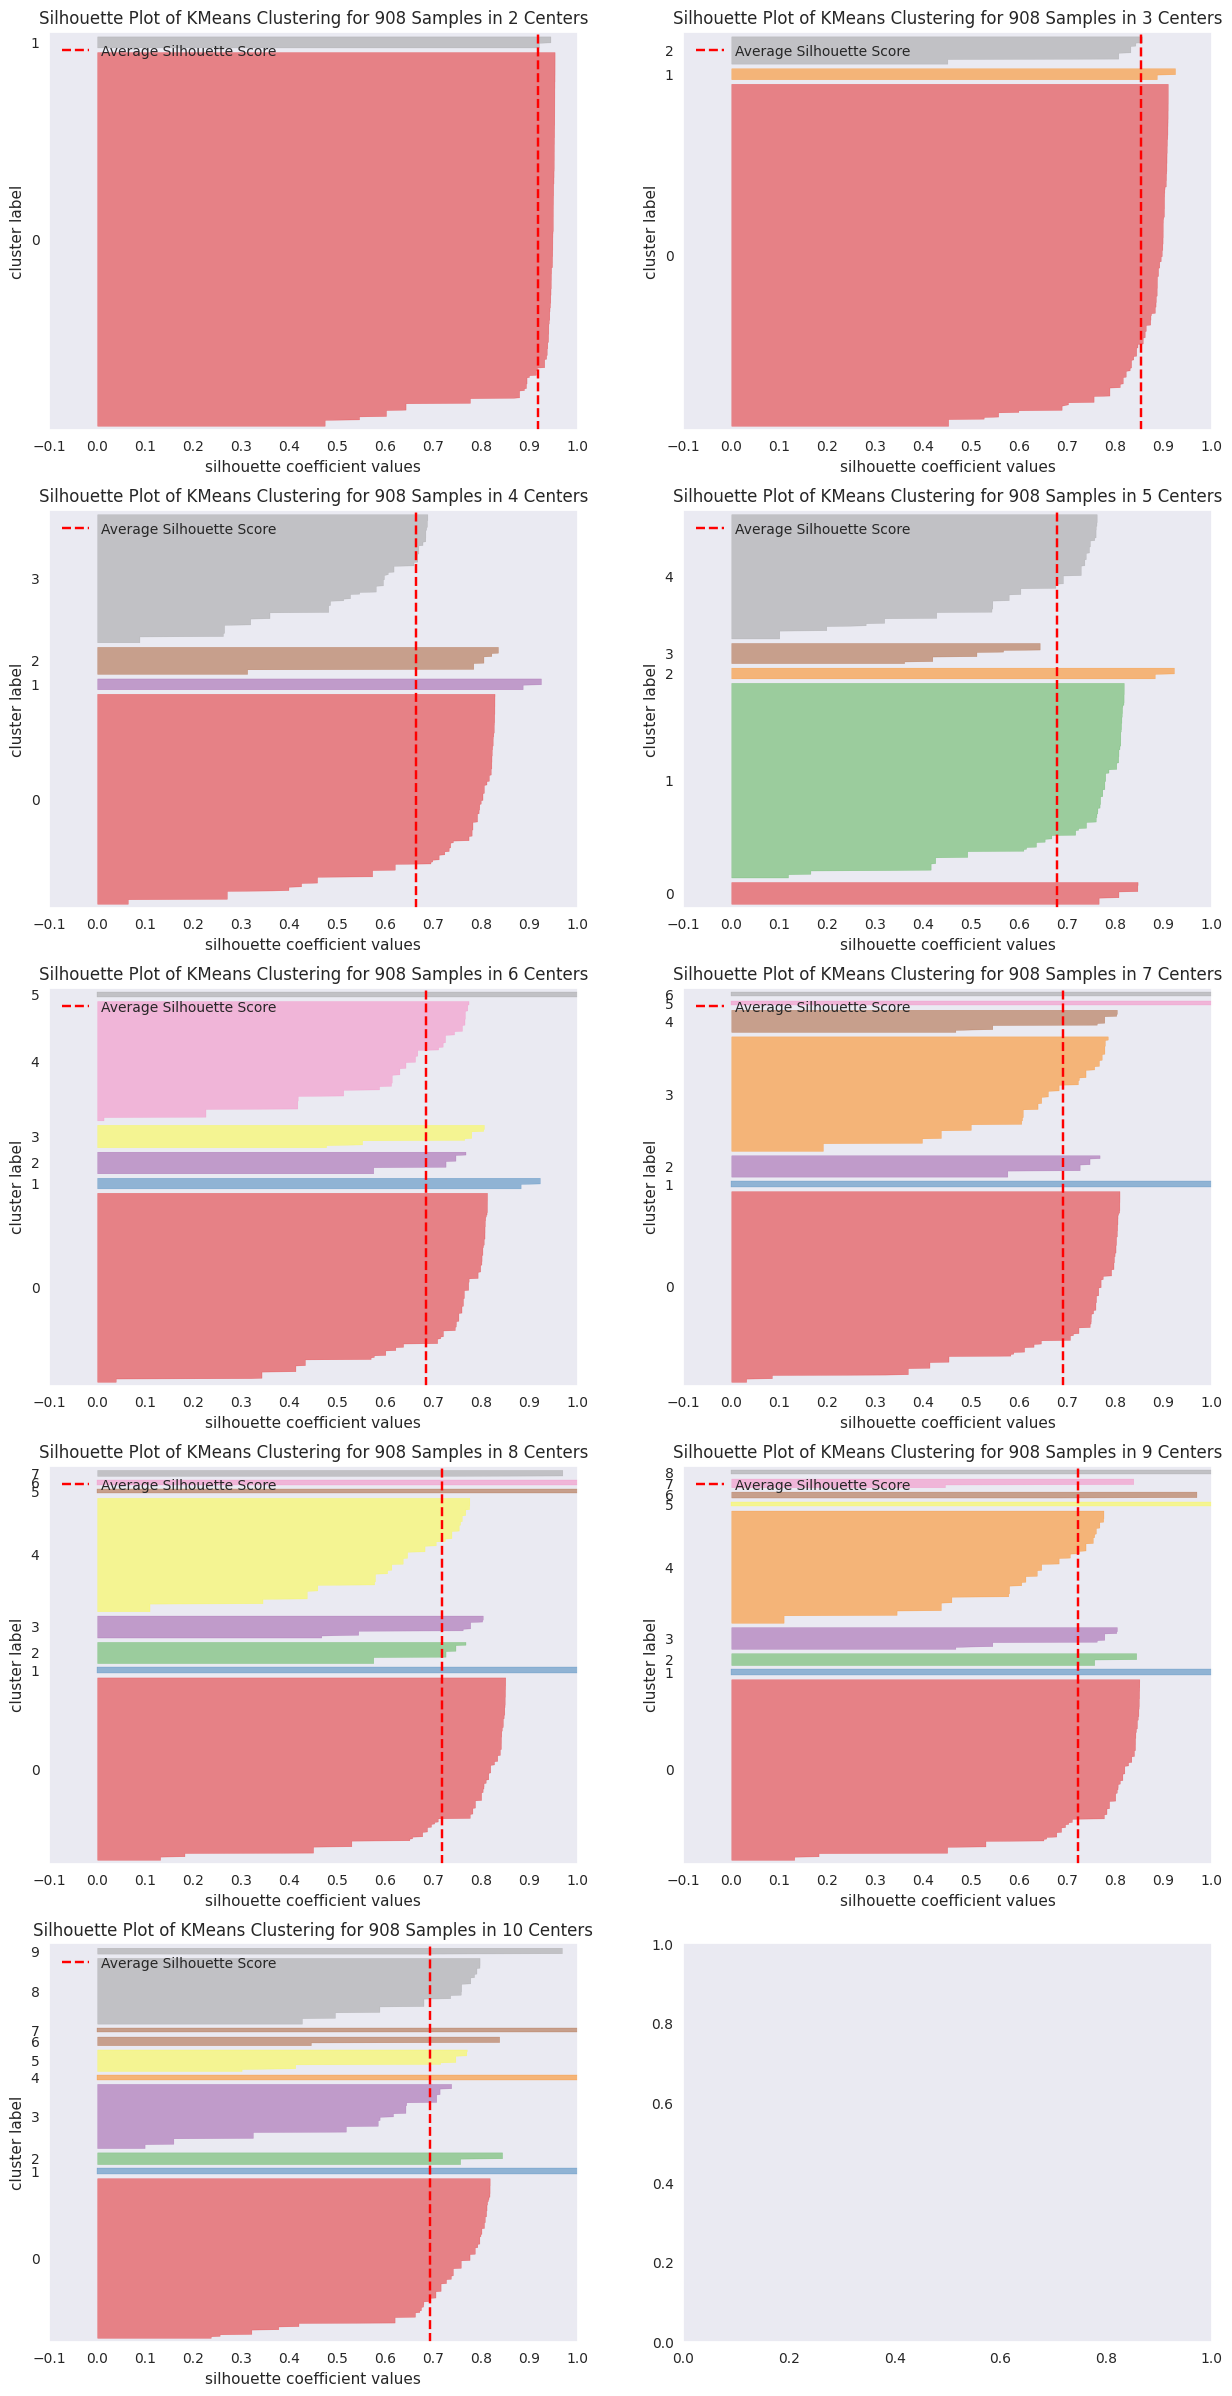

In [ ]:
# Silhouette Score Plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel_August = cluster.KMeans(n_clusters, random_state = 8)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel_August, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(Cluster_August)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

Insight:

*  Highest score is at n_cluster = 2.
*  Best cluster number is 2 with for k=2.
*  The average silhouette score is 0.913.

#### **Implement Clustering**

---

In [ ]:
# Set Implement Clustering In August
Cluster_Model_August = cluster.KMeans(n_clusters=2, random_state = 8)
Cluster_Model_August.fit(Cluster_August)
Cluster_Label_August = Cluster_Model_August.labels_
Cluster_August['Cluster'] = Cluster_Label_August
Cluster_August

,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction,Cluster
user_id,,,,,
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
...,...,...,...,...,...
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0


#### **Cluster Interpretation**

---

##### **Users Age**

---

In [ ]:
# Aggregating By Cluster
Cluster_August.groupby(['Cluster'])['user_age'].agg(['count','mean','min','max'])

,count,mean,min,max
Cluster,,,,
0,881,33.292849,18,59
1,27,44.777778,37,51


Insight:


*  Cluster (0) initial worker group user.
*  Cluster (1) pre-retirement group user.

##### **Users Income Category**

---

In [ ]:
# Aggregating By Cluster
Cluster_August.groupby(['Cluster'])['user_income_category'].agg(['count','sum','mean','min','max'])

,count,sum,mean,min,max
Cluster,,,,,
0,881,1333.0,1.513053,0,4
1,27,45.0,1.666667,0,3


Insight:


*  Cluster (0) user have income <10jt - 1miliar.
*  Cluster (1) user have income <10jt - 500jt.

##### **Users Total Transaction**

---

In [ ]:
# Aggregating By Cluster
Cluster_August.groupby(['Cluster'])['Number_Of_Total_Transaction'].agg(['count','sum','mean','min','max'])

,count,sum,mean,min,max
Cluster,,,,,
0,881,19937,22.629966,16,64
1,27,861,31.888889,23,39


Insight:


*  Cluster (0) infrequent transaction.
*  Cluster (1) frequent transaction.

##### **Users Total Spending**

---

In [ ]:
# Aggregating By Cluster
Cluster_August.groupby(['Cluster'])['Total_Spending_Transaction'].agg(['count','sum','mean','min','max'])

,count,sum,mean,min,max
Cluster,,,,,
0,881,4.223345e+09,4.793809e+06,-9977606.0,37921000.0
1,27,2.724750e+09,1.009167e+08,94000000.0,106450000.0


Insight:


*  Cluster (0) users low risk.
*  Cluster (1) users high risk.

### **Based In September**

---

In [ ]:
# Dataset User In September
User_September

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Month,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,09-21,1,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127761,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127762,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127763,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0
127764,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,Keuntungan Bisnis,71100000,60000000,0,09-21,3,60000000.0


In [ ]:
# Columns User In September
User_September.columns

Index(['user_id', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'referral_code_used', 'user_income_source',
       'end_of_month_invested_amount', 'total_buy_amount', 'total_sell_amount',
       'Month', 'Number_Of_Total_Transaction', 'Total_Spending_Transaction'],
      dtype='object')

In [ ]:
# Dataset Cluster In September
Cluster_September = User_September[['user_id', 'user_age', 'user_income_range', 'Number_Of_Total_Transaction', 'Total_Spending_Transaction']]
Cluster_September

,user_id,user_age,user_income_range,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
1,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
2,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
3,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
4,3816789,53,> Rp 50 Juta - 100 Juta,1,100000.0
...,...,...,...,...,...
127761,3881981,49,> Rp 100 Juta - 500 Juta,3,60000000.0
127762,3881981,49,> Rp 100 Juta - 500 Juta,3,60000000.0
127763,3881981,49,> Rp 100 Juta - 500 Juta,3,60000000.0
127764,3881981,49,> Rp 100 Juta - 500 Juta,3,60000000.0


In [ ]:
# Make Category For Users Income Range
Cluster_September['user_income_range'] = Cluster_September['user_income_range'].astype('category')
Cluster_September['user_income_range'] = Cluster_September['user_income_range'].cat.set_categories(['< 10 Juta','Rp 10 Juta - 50 Juta',
                                                                                                    '> Rp 50 Juta - 100 Juta','> Rp 100 Juta - 500 Juta',
                                                                                                    '> Rp 500 Juta - 1 Miliar','> Rp 1 Miliar'])
Cluster_September['user_income_range'].cat.codes
Cluster_September['user_income_category'] = Cluster_September['user_income_range'].cat.codes

# Drop Coloumn User Income Range
Cluster_September.drop(columns=['user_income_range'],inplace=True)

# Dataset Cluster In September
Cluster_September = Cluster_September[['user_id', 'user_age', 'user_income_category', 'Number_Of_Total_Transaction', 'Total_Spending_Transaction']]

Cluster_September

,user_id,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction
0,3816789,53,2,1,100000.0
1,3816789,53,2,1,100000.0
2,3816789,53,2,1,100000.0
3,3816789,53,2,1,100000.0
4,3816789,53,2,1,100000.0
...,...,...,...,...,...
127761,3881981,49,3,3,60000000.0
127762,3881981,49,3,3,60000000.0
127763,3881981,49,3,3,60000000.0
127764,3881981,49,3,3,60000000.0


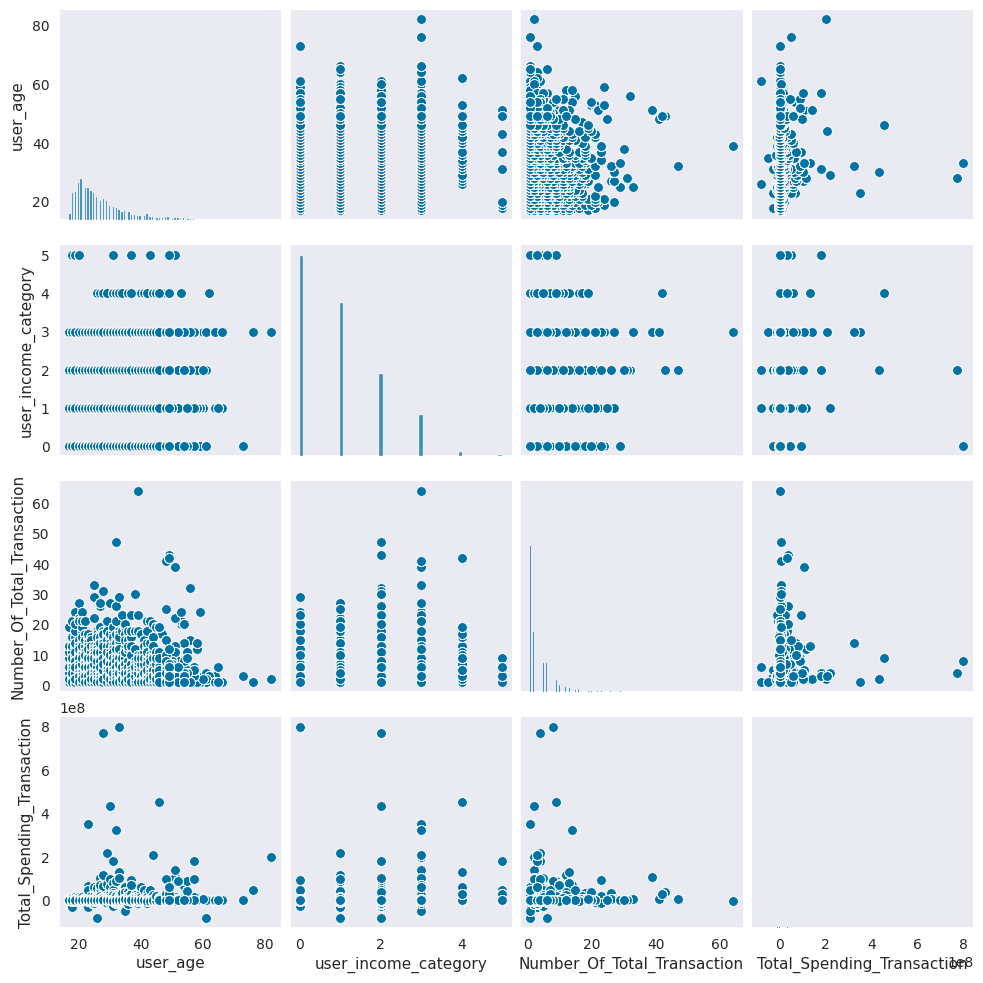

In [ ]:
# Plot Scatter Cluster In September
sns.pairplot(data = Cluster_September)

In [ ]:
# Users Transaction More Than 15 Times
Cluster_September_15 = Cluster_September['Number_Of_Total_Transaction'] > 15.0
Cluster_September = Cluster_September.loc[Cluster_September_15]

# Make user_id as index
Cluster_September.set_index(['user_id'], inplace=True)
Cluster_September

Cluster_September 

,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction
user_id,,,,
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
3742153,51,3,39,106450000.0
...,...,...,...,...
3765807,49,4,42,29790000.0
3765807,49,4,42,29790000.0
3765807,49,4,42,29790000.0


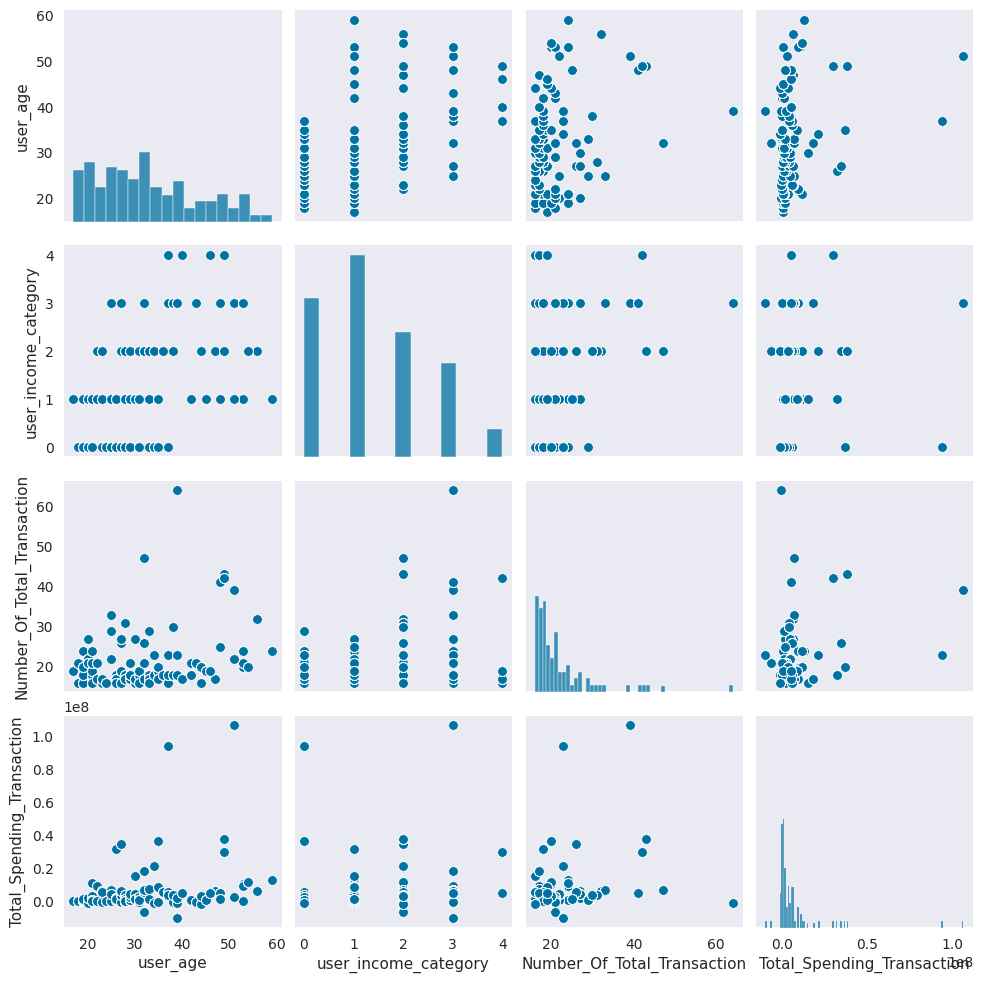

In [ ]:
# Plot Scatter Cluster In September When Transaction More Than 15 Times
sns.pairplot(data = Cluster_September)

#### **K-Means**

---

In [ ]:
Cluster_Model_September = KMeans(n_clusters = 2, random_state = 42)
Cluster_Model_September

KMeans(n_clusters=2, random_state=42)

In [ ]:
Cluster_Model_September.fit(Cluster_September)

KMeans(n_clusters=2, random_state=42)

In [ ]:
Cluster_Model_September.labels_
Cluster_Model_September.cluster_centers_

array([[3.24226695e+01, 1.38559322e+00, 2.17219280e+01, 4.85727555e+06],
       [4.40000000e+01, 1.50000000e+00, 3.10000000e+01, 1.00225000e+08]])

In [ ]:
# Check up cluster label created by the KMeans
Cluster_Model_September.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
Cluster_September['Cluster'] = Cluster_Model_September.labels_
Cluster_September

,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction,Cluster
user_id,,,,,
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
...,...,...,...,...,...
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0


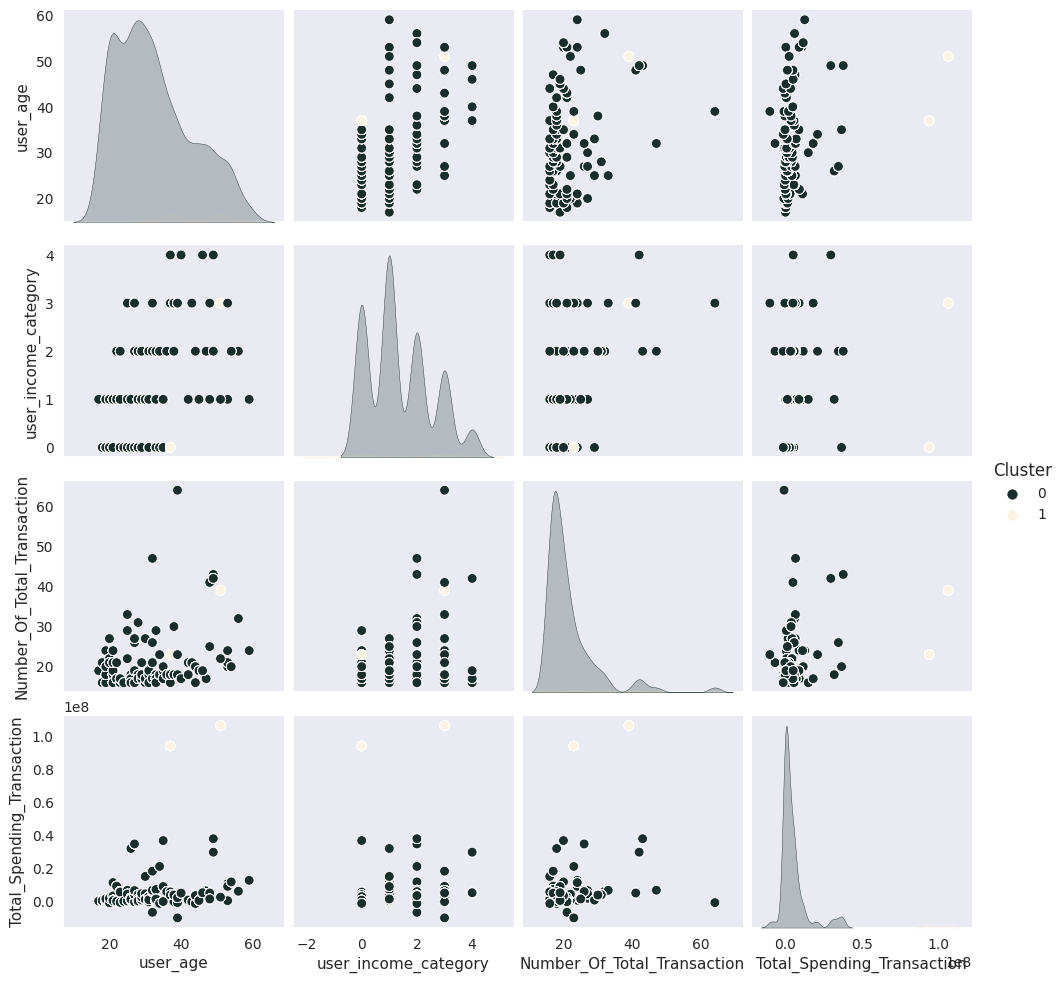

In [ ]:
# Plot Pairplot
sns.pairplot(data = Cluster_September, hue = 'Cluster', palette  = {0:'#192D2C',1:'#FBF3E4'})

Insight:

*  There are 2 cluster.

#### **Elbow**

---

In [ ]:
# Calculate The Distortion Value
distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 8)
  kmeanModel.fit(Cluster_September)
  distortions.append(kmeanModel.inertia_)

print(distortions)

[5.319637509169482e+17, 1.4089745790812266e+17, 3.481869135777703e+16, 1.7087392933554168e+16, 1.0529857739647776e+16, 7461892266518235.0, 4989426105275744.0, 3284398605270718.0, 2457228812979626.0, 1717868314739493.8]


In [ ]:
# Drop Columns Cluster
Cluster_September.drop(columns=['Cluster'], inplace = True)

1 5.319637509169481e+17
2 1.4089745790812266e+17
3 3.481869135777703e+16
4 1.7087392933554168e+16
5 1.0529857739647776e+16
6 7179031381857056.0
7 4989426105275744.0
8 3284398605270718.0
9 2457228812979626.0
10 1717868314739493.8


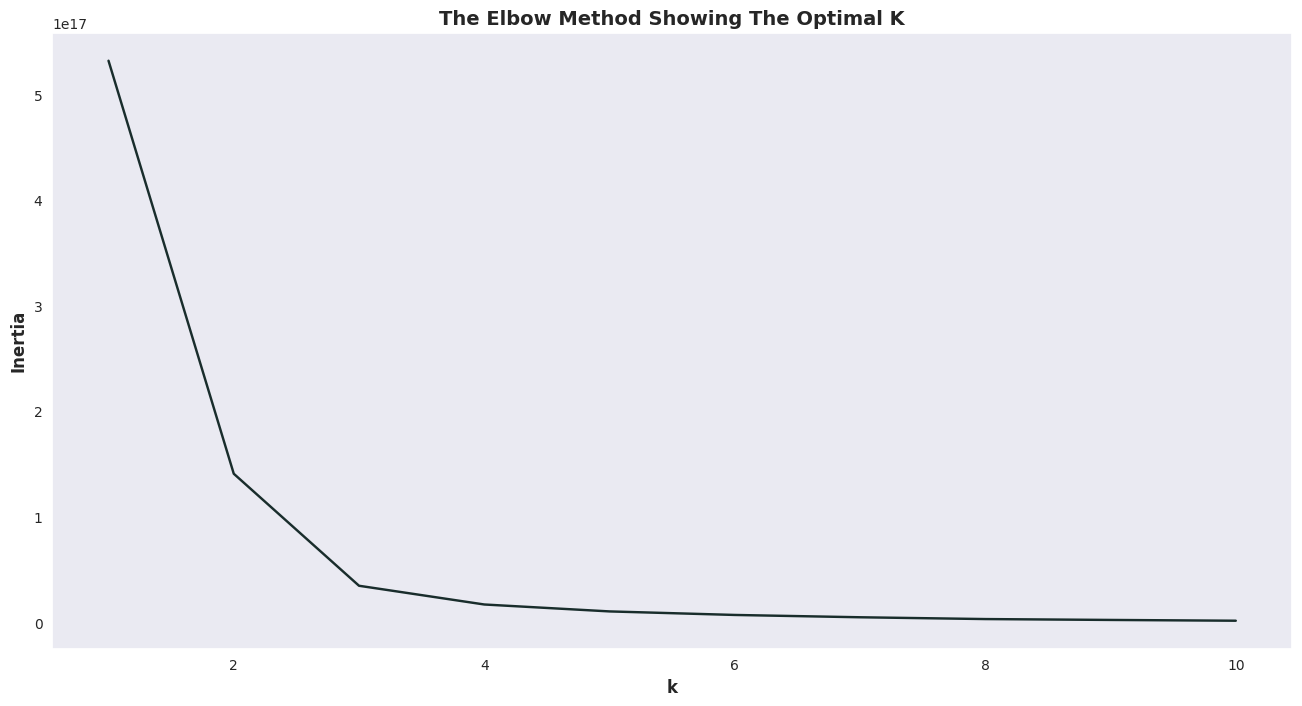

In [ ]:
# Plot Elbow Score
distortions = []
K = range(1,11)
for k in K:
    kmeanModel_September = cluster.KMeans(n_clusters=k, random_state = 8)
    kmeanModel_September.fit(Cluster_September)
    distortions.append(kmeanModel_September.inertia_)
    print(k, kmeanModel_September.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', color='#192D2C')
plt.xlabel('k', weight='bold', fontsize=12)
plt.ylabel('Inertia', weight='bold', fontsize=12)
plt.title('The Elbow Method Showing The Optimal K', weight='bold', fontsize=14)
plt.show()

Insight:

*  Best cluster number is 2.

#### **Silhoutte Method**

---

For k=2, the average silhouette score is 0.9134691449605097
For k=3, the average silhouette score is 0.8338129705664735
For k=4, the average silhouette score is 0.6519219661893831
For k=5, the average silhouette score is 0.6679865918464889
For k=6, the average silhouette score is 0.7047428372393534
For k=7, the average silhouette score is 0.717417915148085
For k=8, the average silhouette score is 0.7196365965290307
For k=9, the average silhouette score is 0.718299264218606
For k=10, the average silhouette score is 0.6671462068128011


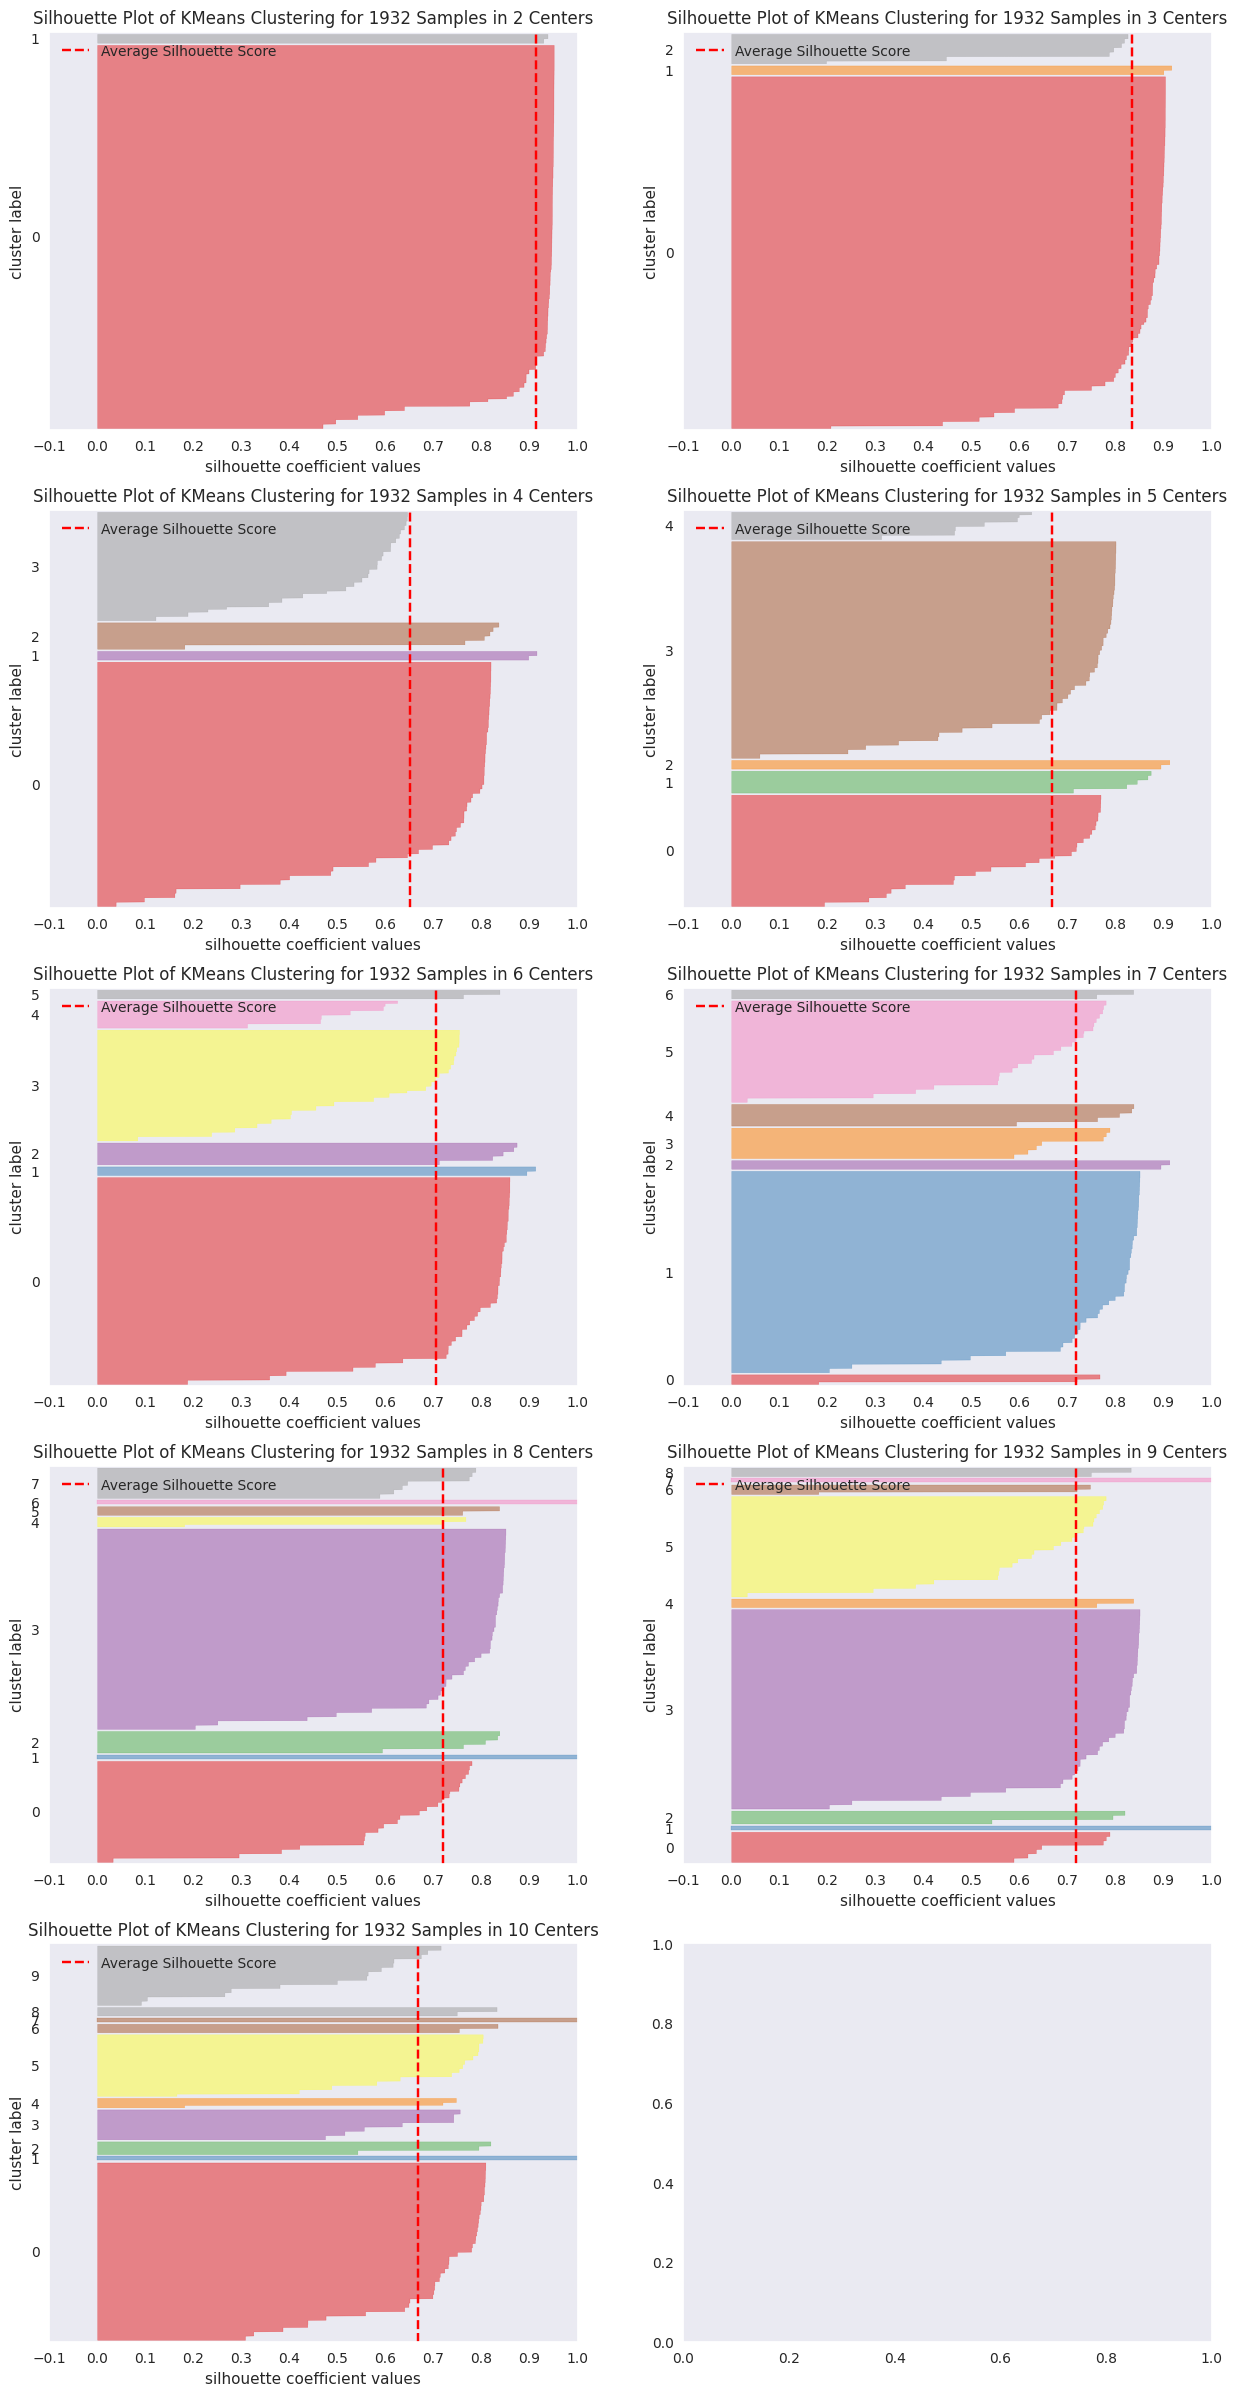

In [ ]:
# Silhouette Score Plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel_September = cluster.KMeans(n_clusters, random_state = 8)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel_September, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(Cluster_September)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

Insight:

*  Highest score is at n_cluster = 2.
*  Best cluster number is 2 with for k=2.
*  The average silhouette score is 0.913.

#### **Implement Clustering**

---

In [ ]:
# Set Implement Clustering In September
Cluster_Model_September = cluster.KMeans(n_clusters=2, random_state = 8)
Cluster_Model_September.fit(Cluster_September)
Cluster_Label_September = Cluster_Model_September.labels_
Cluster_September['Cluster'] = Cluster_Label_September
Cluster_September

,user_age,user_income_category,Number_Of_Total_Transaction,Total_Spending_Transaction,Cluster
user_id,,,,,
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
3742153,51,3,39,106450000.0,1
...,...,...,...,...,...
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0
3765807,49,4,42,29790000.0,0


#### **Cluster Interpretation**

---

##### **Users Age**

---

In [ ]:
# Aggregating By Cluster
Cluster_September.groupby(['Cluster'])['user_age'].agg(['count','mean','min','max'])

,count,mean,min,max
Cluster,,,,
0,1888,32.422669,17,59
1,44,44.000000,37,51


Insight:


*  Cluster (0) initial worker group user.
*  Cluster (1) pre-retirement group user.

##### **Users Income Category**

---

In [ ]:
# Aggregating By Cluster
Cluster_September.groupby(['Cluster'])['user_income_category'].agg(['count','sum','mean','min','max'])

,count,sum,mean,min,max
Cluster,,,,,
0,1888,2616.0,1.385593,0,4
1,44,66.0,1.500000,0,3


Insight:


*  Cluster (0) user have income <10jt - 1miliar.
*  Cluster (1) user have income <10jt - 500jt.

##### **Users Total Transaction**

---

In [ ]:
# Aggregating By Cluster
Cluster_September.groupby(['Cluster'])['Number_Of_Total_Transaction'].agg(['count','sum','mean','min','max'])

,count,sum,mean,min,max
Cluster,,,,,
0,1888,41011,21.721928,16,64
1,44,1364,31.000000,23,39


Insight:


*  Cluster (0) infrequent transaction.
*  Cluster (1) frequent transaction.

##### **Users Total Spending**

---

In [ ]:
# Aggregating By Cluster
Cluster_September.groupby(['Cluster'])['Total_Spending_Transaction'].agg(['count','sum','mean','min','max'])

,count,sum,mean,min,max
Cluster,,,,,
0,1888,9.170536e+09,4.857276e+06,-9977606.0,37921000.0
1,44,4.409900e+09,1.002250e+08,94000000.0,106450000.0


Insight:


*  Cluster (0) users low risk.
*  Cluster (1) users high risk.

## **Summary**

From the descriptive analysis above, we can conclude:

- Cluster 0 (Newbee) has an initial worker group user, but have income <10jt - 1m, with infrequent transaction and user type low-risk low-return investors. 

- Cluster 1 (Oldbee) has a pre-retirement group user, but have income <10jt - 500jt.  with user type high-risk high-return investors. 

# **Recomendation**

Newbee : Give a promos so that the number of their can increase like:
- FREE training class.
- Give cashback with minimum trasaction.
- Give them the minimum transaction target in order to get the. facilities provide in cluster 1.

Oldbee: Treat them like prority customers like:
- FREE cosultation.
- Wealth management service.
- Get FREE AUM/something on every new product lunch.
- Making a easy acces for transaction.  
